### <center> NBA Statistics During Golden State Warriors (GSW) Championship Run Project </center>

### <center><u> Exploratory Data Analysis </u></center>
### Introduction:

In this section of the project, I explore the data that was scraped from the basketball-reference website to see if there are any possible correlations to success (measured in wins) from the basic statistics of NBA teams. And in particular, I will be analyzing how the Golden State Warriors measure up in the relevant statistics as they are the team that have had some of the most significant success for the past 5 seasons. 

Imported libraries are Pandas, Numpy, Matplotlib, and Seaborn; in addition, the copy module has been imported.

In [1]:
import pandas as pd # library for data manipulation and analysis
import numpy as np # library adding support for large arrays and matrices, including mathematical functions
import matplotlib.pyplot as plt # library for general plotting of data
import matplotlib.patches as mpatches # module to manipulate legend in graphs
import seaborn as sns # library for data visualization over matplotlib
%matplotlib inline
import copy # module for deep copy as needed
from pandas.plotting import table as tb # module for plotting table

Read in data and double check data for any issues

In [2]:
# read in csv files for analysis
gsw_df = pd.read_csv("gsw_df.csv")
all_teams_df = pd.read_csv("all_teams_df.csv")

In [3]:
# check head of gsw data frame
gsw_df.head()

,Unnamed: 0,Season,Tm,W,L,Finish,Age,FG,FGA,FG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,0,2019,GSW,57,25,1,28.4,3612,7361,0.491,...,1672,0.801,797.0,2990.0,3787.0,2413,625.0,525.0,1169.0,9650
1,1,2018,GSW,58,24,1,28.8,3509,6981,0.503,...,1668,0.815,691.0,2877.0,3568.0,2402,656.0,612.0,1267.0,9304
2,2,2017,GSW,67,15,1,28.2,3532,7140,0.495,...,1850,0.788,770.0,2873.0,3643.0,2491,785.0,555.0,1211.0,9503
3,3,2016,GSW,73,9,1,27.4,3489,7159,0.487,...,1790,0.763,816.0,2972.0,3788.0,2373,689.0,498.0,1245.0,9421
4,4,2015,GSW,67,15,1,26.6,3410,7137,0.478,...,1709,0.768,853.0,2814.0,3667.0,2248,762.0,496.0,1185.0,9016


In [4]:
# check head of all teams data frame
all_teams_df.head()

,Unnamed: 0,Season,Tm,W,L,Finish,Age,FG,FGA,FG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,0,2019,ATL,29,53,5,25.1,3392,7524,0.451,...,1918,0.752,955.0,2825.0,3780.0,2118,675.0,419.0,1397.0,9294
1,1,2018,ATL,24,58,5,25.4,3130,7015,0.446,...,1654,0.785,743.0,2693.0,3436.0,1946,638.0,348.0,1276.0,8475
2,2,2017,ATL,43,39,2,27.9,3123,6918,0.451,...,2039,0.728,842.0,2793.0,3635.0,1938,672.0,397.0,1294.0,8459
3,3,2016,ATL,48,34,2,28.2,3168,6923,0.458,...,1638,0.783,679.0,2772.0,3451.0,2100,747.0,486.0,1226.0,8433
4,4,2015,ATL,60,22,1,27.8,3121,6699,0.466,...,1735,0.778,715.0,2611.0,3326.0,2111,744.0,380.0,1167.0,8409


In [5]:
# notice discrepancy of "Unnamed: 0" above; double check columns for any other discrepancies 
# used gsw_df in this case as both data frames should have same columns
gsw_df.columns

Index(['Unnamed: 0', 'Season', 'Tm', 'W', 'L', 'Finish', 'Age', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')

In [6]:
# remove 'Unnamed: 0' from columns for both gsw_df and all_teams_df
gsw_df.drop('Unnamed: 0', axis=1, inplace=True)
all_teams_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# double check columns of both data frames
print(gsw_df.columns)
print(all_teams_df.columns)

Index(['Season', 'Tm', 'W', 'L', 'Finish', 'Age', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')
Index(['Season', 'Tm', 'W', 'L', 'Finish', 'Age', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')


### Additional statistics to add to data frame
There are a variety of metrics measured in the NBA, however for the purposes of this project I will be using basic team statistics and will add two additional statistics, Assist-to-Turnover ratio (AstTOVr) and True Shooting Percentage (TS%). These additional statistics have been included due the Golden State Warriors' success and implementation of an offensive system beginning in the 2014-15 NBA season, the first season of their historic run. I will indicate how these metrics are calculated below.

**Assist-to-Turnover Ratio (AstTOVr):**
- **Formula:** assists / turnovers
- **Description:** This ratio is considered to measure ball control; where assists are ball possession opportunities resulting in field goal scores from a player passing the ball to the teammate that scores and turnovers are lost ball possession opportunities.

**True Shooting Percentage (TS%):**
- **Formula:** points / (2 * TSA)
- **Description:** Per basketball-reference glossary, true shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.

**True Shooting Attempts (TSA) - to calculate true shooting percentage (TS%):**
- **Formula:** field goal attempts + (0.44 * free throw attempts)

In [8]:
# formulae for Assist-to-Turnover ratio & True Shooting %

# create new variable: Assist-to-Turnover ratio
all_teams_AstTOVr = all_teams_df['AST']/all_teams_df['TOV']
gsw_AstTOVr = gsw_df['AST']/gsw_df['TOV']

# calculate True Shooting Attempts (TSA) - formula: FGA + (0.44 * FTA)
all_teams_TSA = all_teams_df['FGA'] + (0.44*all_teams_df['FTA'])
gsw_TSA = gsw_df['FGA'] + (0.44*gsw_df['FTA'])

# create new variable: True Shooting % - formula: PTS / (2*TSA)
all_teams_TSP = all_teams_df['PTS'] / (2*all_teams_TSA)
gsw_TSP = gsw_df['PTS'] / (2*gsw_TSA)

In [9]:
# add new variables to data frames

# AstTOVr
all_teams_df['AstTOVr'] = all_teams_AstTOVr
gsw_df['AstTOVr'] = gsw_AstTOVr

# TS%
all_teams_df['TS%'] = all_teams_TSP
gsw_df['TS%'] = gsw_TSP

In [ ]:
# metrics considered for future analysis: Effective field goal % and win %

# # create new variable: Effective Field Goal % (eFG%) - formula: (FG + (0.5*3P)) / FGA
# all_teams_eFGP = (all_teams_df['FG'] + (0.5*all_teams_df['3P']))/all_teams_df['FGA']
# gsw_eFGP = (gsw_df['FG'] + (0.5*gsw_df['3P']))/gsw_df['FGA']

# # create new variable: Win Percentage
# all_teams_WinPer = all_teams_df['W']/82
# gsw_WinPer = gsw_df['W']/82


# # add new variables to data frames

# # eFG%
# all_teams_df['eFG%'] = all_teams_eFGP
# gsw_df['eFG%'] = gsw_eFGP

# # Win%
# all_teams_df['Win%'] = all_teams_WinPer
# gsw_df['Win%'] = gsw_WinPer

In [10]:
# recheck data frame columns to ensure new columns have been added
print(all_teams_df.columns)
print(gsw_df.columns)

Index(['Season', 'Tm', 'W', 'L', 'Finish', 'Age', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'AstTOVr', 'TS%'],
      dtype='object')
Index(['Season', 'Tm', 'W', 'L', 'Finish', 'Age', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'AstTOVr', 'TS%'],
      dtype='object')


**Check correlations and possible issues with collinearity**
<br>For this project, we will be checking for which statistics have positive correlations to Wins (W)</br>

In [11]:
# to view table of correlations for all_teams
all_teams_df.iloc[:, 1:].corr()

,W,L,Finish,Age,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,AstTOVr,TS%
W,1.000000,-1.000000,-0.825537,0.505797,0.430211,0.003772,0.637234,0.354905,0.239725,0.586679,...,-0.073674,0.398874,0.295972,0.410299,0.196374,0.347543,-0.247484,0.478859,0.491826,0.675436
L,-1.000000,1.000000,0.825537,-0.505797,-0.430211,-0.003772,-0.637234,-0.354905,-0.239725,-0.586679,...,0.073674,-0.398874,-0.295972,-0.410299,-0.196374,-0.347543,0.247484,-0.478859,-0.491826,-0.675436
Finish,-0.825537,0.825537,1.000000,-0.463435,-0.292386,0.074747,-0.509029,-0.303828,-0.209821,-0.479392,...,0.129120,-0.314872,-0.192728,-0.261885,-0.110021,-0.278446,0.154564,-0.350936,-0.310978,-0.564883
Age,0.505797,-0.505797,-0.463435,1.000000,0.054717,-0.222172,0.299071,0.111043,0.043486,0.310335,...,-0.300531,0.072072,-0.112119,0.133536,0.002690,0.059977,-0.344975,0.111401,0.337986,0.336101
FG,0.430211,-0.430211,-0.292386,0.054717,1.000000,0.744482,0.749597,0.491523,0.426091,0.436824,...,-0.043503,0.605104,0.488355,0.736460,0.140864,0.231498,-0.044722,0.891802,0.625700,0.705335
FGA,0.003772,-0.003772,0.074747,-0.222172,0.744482,1.000000,0.116712,0.485058,0.520295,0.011197,...,0.237850,0.562714,0.614602,0.441169,-0.009532,-0.000004,-0.061767,0.686187,0.406169,0.200299
FG%,0.637234,-0.637234,-0.509029,0.299071,0.749597,0.116712,1.000000,0.251509,0.119717,0.638129,...,-0.301310,0.341829,0.116324,0.656210,0.221424,0.341028,-0.006999,0.646934,0.527395,0.851323
3P,0.354905,-0.354905,-0.303828,0.111043,0.491523,0.485058,0.251509,1.000000,0.976647,0.409334,...,-0.240868,0.481954,0.270069,0.449660,0.046128,0.072206,-0.023264,0.726130,0.386595,0.657654
3PA,0.239725,-0.239725,-0.209821,0.043486,0.426091,0.520295,0.119717,0.976647,1.000000,0.206818,...,-0.177598,0.451854,0.281008,0.374972,0.044836,0.034720,0.015470,0.677716,0.301900,0.545192
3P%,0.586679,-0.586679,-0.479392,0.310335,0.436824,0.011197,0.638129,0.409334,0.206818,1.000000,...,-0.348600,0.279789,0.036417,0.451791,0.025426,0.181918,-0.168462,0.431006,0.475151,0.676981


In [12]:
# determine which statistics have a positive correlation to wins (above 0.3); append relevant predictor variables to list
pred_var1 = []
init_stat_list = []

for i in all_teams_df.columns[2:]:
    if all_teams_df[i] is not all_teams_df['W']:
        if all_teams_df[i].corr(all_teams_df['W']) > .3:
            print(i + ' | ' + str(round(all_teams_df[i].corr(all_teams_df['W']), 5)))
            pred_var1.append(i)  
            init_stat_list.append(i + ' | ' + str(round(all_teams_df[i].corr(all_teams_df['W']), 5)))

Age | 0.5058
FG | 0.43021
FG% | 0.63723
3P | 0.3549
3P% | 0.58668
2P% | 0.57101
DRB | 0.39887
AST | 0.4103
BLK | 0.34754
PTS | 0.47886
AstTOVr | 0.49183
TS% | 0.67544


In [13]:
with open('initial_list.txt', 'w') as f:
    print(init_stat_list, file=f)

In [13]:
# view correlation table of predictor variables with positive correlation to wins to check for possible collinearity issues
# list of predictor variables ['Age', 'FG', 'FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'BLK', 'PTS', 'AstTOVr', 'TS%']
all_teams_df[pred_var1].corr()

,Age,FG,FG%,3P,3P%,2P%,DRB,AST,BLK,PTS,AstTOVr,TS%
Age,1.000000,0.054717,0.299071,0.111043,0.310335,0.256119,0.072072,0.133536,0.059977,0.111401,0.337986,0.336101
FG,0.054717,1.000000,0.749597,0.491523,0.436824,0.762395,0.605104,0.736460,0.231498,0.891802,0.625700,0.705335
FG%,0.299071,0.749597,1.000000,0.251509,0.638129,0.807537,0.341829,0.656210,0.341028,0.646934,0.527395,0.851323
3P,0.111043,0.491523,0.251509,1.000000,0.409334,0.665365,0.481954,0.449660,0.072206,0.726130,0.386595,0.657654
3P%,0.310335,0.436824,0.638129,0.409334,1.000000,0.405217,0.279789,0.451791,0.181918,0.431006,0.475151,0.676981
2P%,0.256119,0.762395,0.807537,0.665365,0.405217,1.000000,0.456249,0.664980,0.292677,0.833461,0.494371,0.912917
DRB,0.072072,0.605104,0.341829,0.481954,0.279789,0.456249,1.000000,0.457020,0.322488,0.626852,0.382916,0.438827
AST,0.133536,0.736460,0.656210,0.449660,0.451791,0.664980,0.457020,1.000000,0.335116,0.657410,0.728183,0.636266
BLK,0.059977,0.231498,0.341028,0.072206,0.181918,0.292677,0.322488,0.335116,1.000000,0.193248,0.164722,0.277594
PTS,0.111401,0.891802,0.646934,0.726130,0.431006,0.833461,0.626852,0.657410,0.193248,1.000000,0.542501,0.824397


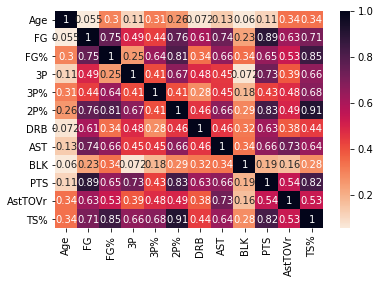

In [14]:
# heatmap visualization of correlations for initial predictor variables 
# list of predictor variables ['Age', 'FG', 'FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'BLK', 'PTS', 'AstTOVr', 'TS%']
sns.heatmap(all_teams_df[pred_var1].corr(), annot=True, cmap = 'rocket_r')
plt.show()

In [15]:
# create a list of predictor variable names to check for collinearity issues; check for collinearity where correlation is > 0.75
# list of predictor variables ['Age', 'FG', 'FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'BLK', 'PTS', 'AstTOVr', 'TS%']
check_list = copy.deepcopy(pred_var1)
init_stat_corr = []

for i in check_list:
    for e in check_list[::-1]:
        if all_teams_df[i] is not all_teams_df[e]:
            if all_teams_df[i] is all_teams_df['TS%']:
                break
            elif all_teams_df[i].corr(all_teams_df[e]) > 0.75:
                print(i + ' corr ' + e + ' | ' + str(round(all_teams_df[i].corr(all_teams_df[e]), 5)))
                init_stat_corr.append(i + ' corr ' + e + ' | ' + str(round(all_teams_df[i].corr(all_teams_df[e]), 5)))
        elif all_teams_df[i] is all_teams_df['PTS'] and all_teams_df[e] is all_teams_df['PTS']:
                break

FG corr PTS | 0.8918
FG corr 2P% | 0.76239
FG% corr TS% | 0.85132
FG% corr 2P% | 0.80754
2P% corr TS% | 0.91292
2P% corr PTS | 0.83346
2P% corr FG% | 0.80754
2P% corr FG | 0.76239
PTS corr TS% | 0.8244


In [20]:
with open('initial_corr.txt', 'w') as f:
    print(init_stat_corr, file=f)

Based on above information, these metrics (i.e. 2P%, FG, FG%, PTS, TS%) have high collinearity issues. For purposes of this project, I will keep TS% as it is noted to be a measurement of shooting efficiency, and will remove the remaining metric variables 2P%, FG, FG%, PTS.

In [16]:
# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
pred_var2 = ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
all_teams_df[pred_var2].corr()

,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
Age,1.000000,0.111043,0.310335,0.072072,0.133536,0.059977,0.337986,0.336101
3P,0.111043,1.000000,0.409334,0.481954,0.449660,0.072206,0.386595,0.657654
3P%,0.310335,0.409334,1.000000,0.279789,0.451791,0.181918,0.475151,0.676981
DRB,0.072072,0.481954,0.279789,1.000000,0.457020,0.322488,0.382916,0.438827
AST,0.133536,0.449660,0.451791,0.457020,1.000000,0.335116,0.728183,0.636266
BLK,0.059977,0.072206,0.181918,0.322488,0.335116,1.000000,0.164722,0.277594
AstTOVr,0.337986,0.386595,0.475151,0.382916,0.728183,0.164722,1.000000,0.533207
TS%,0.336101,0.657654,0.676981,0.438827,0.636266,0.277594,0.533207,1.000000


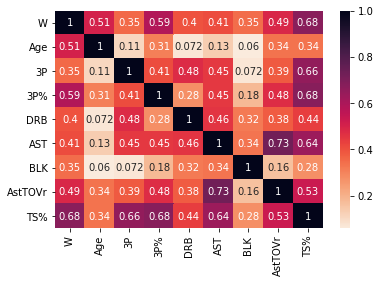

In [17]:
# heatmap visualization of correlations for predictor variables after adjusting for variables with possible collinearity issues
# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%'] vs Wins
sns.heatmap(all_teams_df[['W','Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].corr(), annot=True, cmap = 'rocket_r')
# plt.show()
plt.savefig('pred_var_heatmap.png')

Take a quick look at GSW age over the past 5 seasons

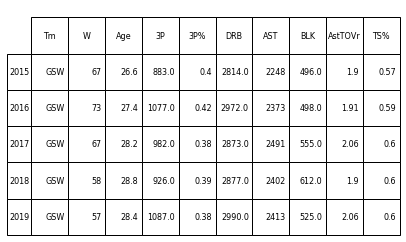

In [18]:
# create table to see GSW Age over the years along with their W/L record
gsw_age_vals = gsw_df[['Season','Tm','W','Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].sort_values(by='Season').copy(deep=True)
gsw_age_vals.set_index(gsw_age_vals['Season'].values, inplace=True)
gsw_age_vals.drop('Season', axis=1, inplace=True)

axt1 = plt.subplot(frame_on=False)
axt1.xaxis.set_visible(False)
axt1.yaxis.set_visible(False)
gsw_tb = tb(axt1, gsw_age_vals.round(2), loc='center', bbox=[0,-.05,1.1,1])
gsw_tb.auto_set_font_size(False)
gsw_tb.set_fontsize(8)

plt.savefig('gsw_age_vals.png')

**Creates graphs of each statistic for all teams throughout the 5 seasons (i.e. 2014-15 to 2018-19)**
- Each metric (Age, 3P, 3P%, DRB, AST, BLK, AstTOVr, TS%) in relation to wins
- Label GSW with each season to view team's performance in metric

In [19]:
# Initialize list variables to color code points for GSW vs rest of the NBA teams 
# Create labels for each year to place on GSW points. 

# color markers based on team
col_all_seas = []
for team in all_teams_df['Tm']:
    if team == 'GSW':
        col_all_seas.append('yellow')
    else:
        col_all_seas.append('#1f77b4')

# create ndarray variable for season values
seasons_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['Season'].values

# create list of labels for each year of GSW point
seasons_labels = []
for year in seasons_gsw:
    if year == 2019:
        seasons_labels.append("'19")
    elif year == 2018:
        seasons_labels.append("'18")
    elif year == 2017:
        seasons_labels.append("'17")
    elif year == 2016:
        seasons_labels.append("'16")
    else:
        seasons_labels.append("'15")
        
# create legend
all_leg_gsw = mpatches.Patch(color='yellow', label='GSW')
all_leg_teams = mpatches.Patch(color='#1f77b4', label='Rest of NBA')

**Age**

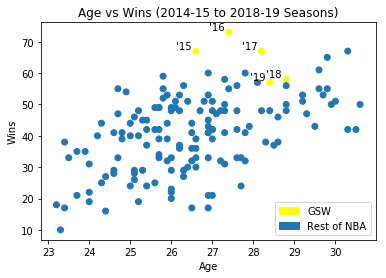

In [20]:
# take a closer look at age vs wins for all seasons (i.e. 2014-2015 to 2018-2019)
        
plt.scatter(x=all_teams_df['Age'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
xage_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['Age'].values
yage_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_age,xage,yage in zip(seasons_labels, xage_gsw, yage_gsw):
    plt.annotate(s=label_age, xy=(xage, yage), xytext=(-20,2), textcoords='offset points')

plt.xlabel('Age')
plt.ylabel('Wins')
plt.title('Age vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('age_vs_wins.png',bboxinches='tight')

**3P**

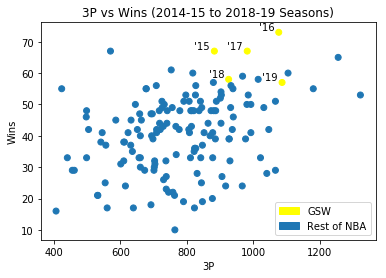

In [21]:
# take a closer look at 3P vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

plt.scatter(x=all_teams_df['3P'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
x3p_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['3P'].values
y3p_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_3p,x3p,y3p in zip(seasons_labels, x3p_gsw, y3p_gsw):
    plt.annotate(s=label_3p, xy=(x3p, y3p), xytext=(-20,2), textcoords='offset points')
    
plt.xlabel('3P')
plt.ylabel('Wins')
plt.title('3P vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('3p_vs_wins.png',bboxinches='tight')

**3P%**

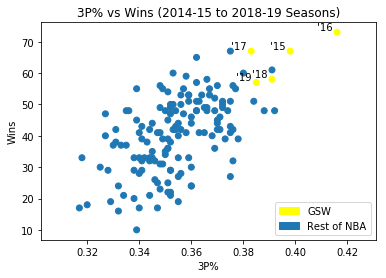

In [22]:
# take a closer look at 3P% vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

plt.scatter(x=all_teams_df['3P%'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
x3pct_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['3P%'].values
y3pct_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_3pct,x3pct,y3pct in zip(seasons_labels, x3pct_gsw, y3pct_gsw):
    plt.annotate(s=label_3pct, xy=(x3pct, y3pct), xytext=(-20,2), textcoords='offset points')
    
plt.xlabel('3P%')
plt.ylabel('Wins')
plt.title('3P% vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('3pct_vs_wins.png',bboxinches='tight')

**DRB**

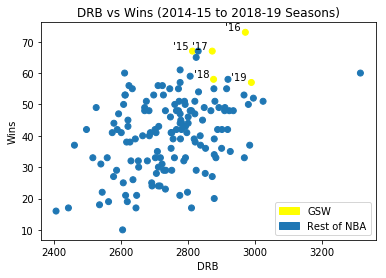

In [23]:
# take a closer look at DRB vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

plt.scatter(x=all_teams_df['DRB'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
xdrb_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['DRB'].values
ydrb_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_drb,xdrb,ydrb in zip(seasons_labels, xdrb_gsw, ydrb_gsw):
    plt.annotate(s=label_drb, xy=(xdrb, ydrb), xytext=(-20,2), textcoords='offset points')
    
plt.xlabel('DRB')
plt.ylabel('Wins')
plt.title('DRB vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('drb_vs_wins.png',bboxinches='tight')

**AST**

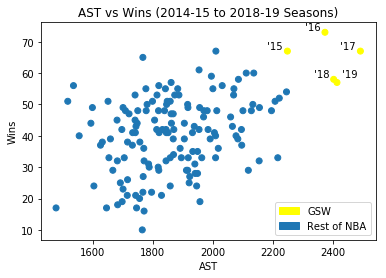

In [24]:
# take a closer look at AST vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

plt.scatter(x=all_teams_df['AST'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
xast_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['AST'].values
yast_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_ast,xast,yast in zip(seasons_labels, xast_gsw, yast_gsw):
    if label_ast == "'19":
        plt.annotate(s=label_ast, xy=(xast, yast), xytext=(5,5), textcoords='offset points')
    else:
        plt.annotate(s=label_ast, xy=(xast, yast), xytext=(-20,2), textcoords='offset points')
    
plt.xlabel('AST')
plt.ylabel('Wins')
plt.title('AST vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('ast_vs_wins.png',bboxinches='tight')

**BLK**

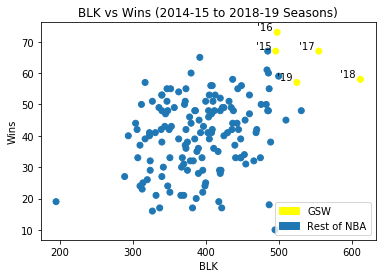

In [25]:
# take a closer look at BLK vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

plt.scatter(x=all_teams_df['BLK'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
xblk_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['BLK'].values
yblk_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_blk,xblk,yblk in zip(seasons_labels, xblk_gsw, yblk_gsw):
    plt.annotate(s=label_blk, xy=(xblk, yblk), xytext=(-20,2), textcoords='offset points')
    
plt.xlabel('BLK')
plt.ylabel('Wins')
plt.title('BLK vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('blk_vs_wins.png',bboxinches='tight')

**AstTOVr**

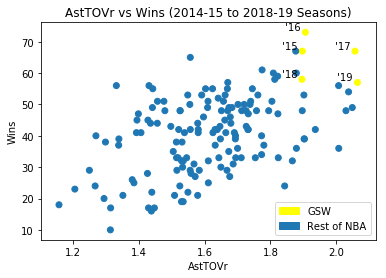

In [26]:
# take a closer look at AstTOVr vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

plt.scatter(x=all_teams_df['AstTOVr'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
xAstTOVr_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['AstTOVr'].values
yAstTOVr_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_AstTOVr,xAstTOVr,yAstTOVr in zip(seasons_labels, xAstTOVr_gsw, yAstTOVr_gsw):
    plt.annotate(s=label_AstTOVr, xy=(xAstTOVr, yAstTOVr), xytext=(-20,2), textcoords='offset points')
    
plt.xlabel('AstTOVr')
plt.ylabel('Wins')
plt.title('AstTOVr vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('asttovr_vs_wins.png',bboxinches='tight')

**TS%**

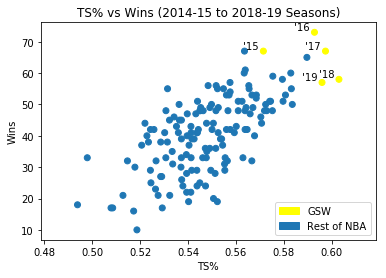

In [27]:
# take a closer look at TS% vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

plt.scatter(x=all_teams_df['TS%'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# create new variables as ndarrays
xTSpct_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['TS%'].values
yTSpct_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# create labels
for label_TSpct,xTSpct,yTSpct in zip(seasons_labels, xTSpct_gsw, yTSpct_gsw):
    plt.annotate(s=label_TSpct, xy=(xTSpct, yTSpct), xytext=(-20,2), textcoords='offset points')
    
plt.xlabel('TS%')
plt.ylabel('Wins')
plt.title('TS% vs Wins (2014-15 to 2018-19 Seasons)')

# add legend
plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# plt.show()
plt.savefig('tspct_vs_wins.png',bboxinches='tight')

**Create new data frames with pertinent predictor variables**
- one data frame for total averages of each season with given predictor variables
- set of data frames for all_teams using predictor variables **(NOTE: broken down per season)**

In [28]:
# create new data frame with the averages of predictor variables grouped by season
# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%'] + 'W' to create table
WINS_mean_tb = all_teams_df.groupby(by=['Season']).mean()[['W', 'Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].copy(deep=True)

# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
WINS_mean = all_teams_df.groupby(by=['Season']).mean()[pred_var2].copy(deep=True)

# view new data frame
WINS_mean

,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
Season,,,,,,,,
2015,26.746667,643.333333,0.349100,2657.433333,1806.733333,393.233333,1.547869,0.534194
2016,26.636667,698.433333,0.352767,2734.033333,1827.733333,406.433333,1.556807,0.541245
2017,26.586667,791.600000,0.357167,2736.966667,1855.333333,388.966667,1.631606,0.552415
2018,26.446667,860.233333,0.361733,2772.033333,1905.433333,394.866667,1.632766,0.556167
2019,26.276667,931.833333,0.355500,2855.100000,2016.100000,406.166667,1.752857,0.559579


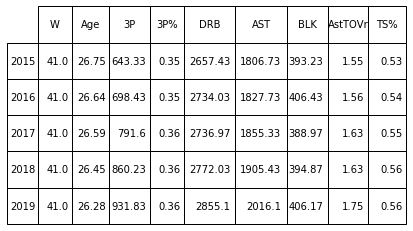

In [29]:
axmean = plt.subplot(frame_on=False)
axmean.xaxis.set_visible(False)
axmean.yaxis.set_visible(False)
tbmean = tb(axmean, WINS_mean_tb.round(2), loc='center', bbox=[0,0,1.1,1], colWidths=[0.1,0.11, 0.12, 0.1, 0.15, 0.15, 0.12, 0.12, 0.11, 0.11])
tbmean.auto_set_font_size(False)
tbmean.set_fontsize(10)

plt.savefig('season_mean_vals.png')

**Quick year-over-year analysis of data for each stat**

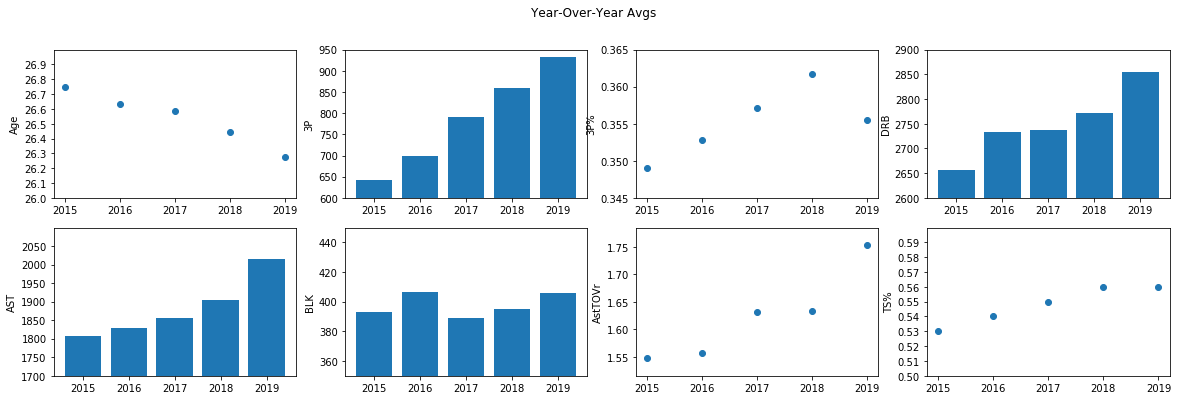

In [30]:
# create graphs to visualize year-over-year change in mean stats for each variable
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2,ncols=4,figsize=(20,6))
# fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(20,6))
WINS_x_labels = ['2015','2016','2017','2018','2019']

ax1.scatter(x=WINS_x_labels, y='Age', data=WINS_mean)
ax1.set(ylabel='Age')
ax1.set_ylim([26,27])
ax1.set_yticks(np.arange(26,27,.1))

ax2.bar(x=WINS_x_labels, height='3P', data=WINS_mean)
ax2.set(ylabel='3P')
ax2.set_ylim([600,950])

ax3.scatter(x=WINS_x_labels, y='3P%', data=WINS_mean)
ax3.set(ylabel='3P%')
ax3.set_ylim([0.345,0.365])
ax3.set_yticks(np.arange(0.345,0.365,0.005))


ax4.bar(x=WINS_x_labels, height='DRB', data=WINS_mean)
ax4.set(ylabel='DRB')
ax4.set_ylim([2600,2900])

ax5.bar(x=WINS_x_labels, height='AST', data=WINS_mean)
ax5.set(ylabel='AST')
ax5.set_ylim([1700,2100])
ax5.set_yticks(np.arange(1700,2100,50))

ax6.bar(x=WINS_x_labels, height='BLK', data=WINS_mean)
ax6.set(ylabel='BLK')
ax6.set_ylim([350,450])

ax7.scatter(x=WINS_x_labels, y='AstTOVr', data=WINS_mean)
ax7.set(ylabel='AstTOVr')

ax8.scatter(x=WINS_x_labels, y='TS%', data=round(WINS_mean,2))
ax8.set(ylabel='TS%')
ax8.set_ylim([0.5,0.6])
ax8.set_yticks(np.arange(0.5,0.6,0.01))

## PRACTICE PLOTS USING SEABORN SCATTER
# sns.scatterplot(x=WINS_x_labels, y='Age', ax=ax1, data=WINS_mean)
# sns.scatterplot(x=WINS_x_labels, y='3P', ax=ax2, data=WINS_mean)
# sns.scatterplot(x=WINS_x_labels, y='3P%', ax=ax3,  data=WINS_mean)
# ax3.set_yticks(np.arange(0.345,0.365,step=0.005))
# sns.scatterplot(x=WINS_x_labels, y='DRB', ax=ax4,  data=WINS_mean)
# sns.scatterplot(x=WINS_x_labels, y='AST', ax=ax5, data=WINS_mean)
# sns.scatterplot(x=WINS_x_labels, y='BLK', ax=ax6, data=WINS_mean)
# sns.scatterplot(x=WINS_x_labels, y='AstTOVr', ax=ax7, data=WINS_mean)
# sns.scatterplot(x=WINS_x_labels, y='TS%', ax=ax8, data=round(WINS_mean,2))

plt.suptitle(t='Year-Over-Year Avgs')

# plt.show()
plt.savefig('yoy_mean.png',bbox_inches='tight')

In [31]:
# create data frame for each specific season for all_teams to break down into predictor variables
season_2015 = all_teams_df[all_teams_df['Season']==2015].copy(deep=True)
season_2016 = all_teams_df[all_teams_df['Season']==2016].copy(deep=True)
season_2017 = all_teams_df[all_teams_df['Season']==2017].copy(deep=True)
season_2018 = all_teams_df[all_teams_df['Season']==2018].copy(deep=True)
season_2019 = all_teams_df[all_teams_df['Season']==2019].copy(deep=True)

# create data frame from each season for all_teams broken down by predictor variables
# list of predictor variables ['Season', 'Tm', 'W', 'Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
pred_var_teams = ['Season', 'Tm', 'W', 'Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']

WINS_teams_2015 = season_2015[pred_var_teams].copy(deep=True)
WINS_teams_2016 = season_2016[pred_var_teams].copy(deep=True)
WINS_teams_2017 = season_2017[pred_var_teams].copy(deep=True)
WINS_teams_2018 = season_2018[pred_var_teams].copy(deep=True)
WINS_teams_2019 = season_2019[pred_var_teams].copy(deep=True)

**Explore data for each year**
<br>Predictor variables: Age, 3P, 3P%, DRB, AST, BLK, AstTOVr, TS%</br>
- Find max values for each predictor variable (first for all 5 seasons combined, then each individual season); see whether the Golden State Warriors (GSW) or another team are at the top
- For each year, view which teams are greater than the mean statistic for the predictor variable in that year and that also have wins (W) equal or greater than the 9th team in the division (Eastern / Western Conferences)
- If GSW was not the top value for a predictor variable, create a graph to visualize where GSW placed amongst the top 5 teams for that predictor variable (including the Wins of the top 5 teams) as well as the AVG for the predictor variable and Wins (W).

In [32]:
# create lists for western and eastern conferences 

west_conf = ['DAL','DEN','GSW','HOU','LAC','LAL','MEM','MIN','NOP','OKC','PHO','POR','SAC','SAS','UTA']
east_conf = ['ATL','BOS','BRK','CHO','CHI','CLE', 'DET','IND','MIA','MIL','NYK','ORL','PHI','TOR','WAS']

In [33]:
# find the index of the max value for all seasons (i.e. 2014-2015 to 2018-2019)
idx_max_val_all_seasons = all_teams_df[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax()
idx_max_val_all_seasons

Age        26
3P         50
3P%        48
DRB        80
AST        47
BLK        46
AstTOVr    45
TS%        46
dtype: int64

In [34]:
# view the rows of indexes with max value
max_val_all_seasons = all_teams_df[['Season','Tm','Age','W','L','3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].loc[[26,50,48,80,47,46,45]]
max_val_all_seasons

,Season,Tm,Age,W,L,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
26,2018,CLE,30.6,50,32,981.0,0.372,2761.0,1916,312.0,1.701599,0.583507
50,2019,HOU,29.2,53,29,1323.0,0.356,2613.0,1741,405.0,1.591408,0.580660
48,2016,GSW,27.4,73,9,1077.0,0.416,2972.0,2373,498.0,1.906024,0.592769
80,2019,MIL,26.9,60,22,1105.0,0.353,3316.0,2136,486.0,1.878628,0.582879
47,2017,GSW,28.2,67,15,982.0,0.383,2873.0,2491,555.0,2.056978,0.597372
46,2018,GSW,28.8,58,24,926.0,0.391,2877.0,2402,612.0,1.895817,0.602987
45,2019,GSW,28.4,57,25,1087.0,0.385,2990.0,2413,525.0,2.064157,0.595923


In [35]:
# round statistic values to fit in table cells; concat Pandas series together
max_val_seasons = pd.concat([max_val_all_seasons[['Season','Tm']], max_val_all_seasons[['W','Age','3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].round(3)], axis=1).copy(deep=True)

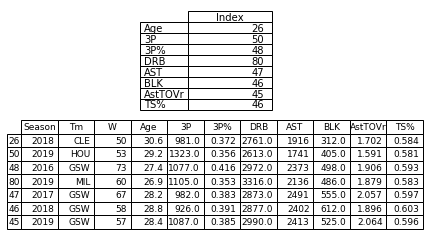

In [36]:
# create tables to show print out of idxmax() and loc[idxmax] for each statistic

# table for idxmax()
axMaxIdx = plt.subplot(211,frame_on=False)
# title='Stat Max Value 2014-15 to 2018-19'
# axMaxIdx.title.set_position([0.2,0.2])
# axMaxIdx.title.set_fontsize(20)
axMaxIdx.xaxis.set_visible(False)
axMaxIdx.yaxis.set_visible(False)
tbMaxIdx = tb(axMaxIdx, idx_max_val_all_seasons, loc='center', bbox=[.4,-.05,.25,1], colLabels=['Index'], colWidths=[0.2,0.05])

# table for loc[idxmax]
axMaxVals = plt.subplot(212,frame_on=False)
axMaxVals.xaxis.set_visible(False)
axMaxVals.yaxis.set_visible(False)
tbMaxVals = tb(axMaxVals, max_val_seasons, loc='center', bbox=[-.1,-.05,1.2,1.1])
tbMaxVals.auto_set_font_size(False)
tbMaxVals.set_fontsize(9)

plt.savefig('max_stat_vals.png')

## Per season analysis below
- sorted by season, stats where GSW was not ranked 1st, western/eastern conference vs league average

### <center> 2015 Season </center>

In [37]:
# create new lists for each conference; appending the Wins for each team in the given year
west_2015 = []
east_2015 = []

for i in west_conf:
    for e, team in enumerate(WINS_teams_2015['Tm']):
        if i == team:
            west_2015.append([WINS_teams_2015['Tm'].iloc[e], WINS_teams_2015['W'].iloc[e]])
            
for i in east_conf:
    for e, team in enumerate(WINS_teams_2015['Tm']):
        if i == team:
            east_2015.append([WINS_teams_2015['Tm'].iloc[e], WINS_teams_2015['W'].iloc[e]])

In [38]:
# sort list so that Wins are descending from greatest to lowest
west_2015_sorted = []
east_2015_sorted = []

west_2015_sorted = sorted(west_2015, key=lambda x:x[1], reverse=True)
east_2015_sorted = sorted(east_2015, key=lambda x:x[1], reverse=True)

In [39]:
# View teams that are greater than the mean statistic for each predictor variable and have equal or greater Wins than the 9th placed team in their respective conference
# Include team name ('Tm'), division ('Div'), wins ('Wins'), predictor variable ('Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%')
for f, col in enumerate(WINS_mean.columns): # loop through columns to run through each predictor variable
    print('\033[1m\033[4m' + '\n' + str('2015' + ' season: ' +  str(col) + ' stats'))
    for g in range(len(WINS_teams_2015)): # loop through total number of teams
        if WINS_mean.iloc[0][f] < WINS_teams_2015.iloc[g][f+3]: # check if statistic for team is greater than the average for the season
            for e, team in enumerate(west_2015_sorted): # check western conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2015.iloc[g][1] == team[0]:
                    if WINS_teams_2015.iloc[g][2] >= west_2015_sorted[7][1]:
                        if WINS_teams_2015.iloc[g][1] == 'GSW':
                            h = WINS_teams_2015.index[g]
                            print('\033[1m\033[91m' + 'Tm: ' + WINS_teams_2015['Tm'].loc[h] + '    Div: West    Wins: ' + str(WINS_teams_2015.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2015.iloc[g][f+3], 5)))
                        else:
                            i = WINS_teams_2015.index[g]
                            print('\033[0m' + 'Tm: ' + WINS_teams_2015['Tm'].loc[i] + '    Div: West    Wins: ' + str(WINS_teams_2015.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2015.iloc[g][f+3], 5)))  
                
            for e2, team2 in enumerate(east_2015_sorted): # check eastern conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2015.iloc[g][1] == team2[0]:
                    if WINS_teams_2015.iloc[g][2] >= east_2015_sorted[7][1]:
                        i = WINS_teams_2015.index[g]
                        print('\033[0m' + 'Tm: ' + WINS_teams_2015['Tm'].loc[i] + '    Div: East    Wins: ' + str(WINS_teams_2015.iloc[g][2])
                                + '    ' + col + ' ' + str(round(WINS_teams_2015.iloc[g][f+3], 5)))


2015 season: Age stats
Tm: ATL    Div: East    Wins: 60    Age 27.8
Tm: BRK    Div: East    Wins: 38    Age 28.6
Tm: CHI    Div: East    Wins: 50    Age 28.8
Tm: CLE    Div: East    Wins: 53    Age 26.9
Tm: DAL    Div: West    Wins: 50    Age 29.9
Tm: HOU    Div: West    Wins: 56    Age 27.6
Tm: IND    Div: East    Wins: 38    Age 28.3
Tm: LAC    Div: West    Wins: 56    Age 28.8
Tm: MEM    Div: West    Wins: 55    Age 29.6
Tm: POR    Div: West    Wins: 51    Age 27.0
Tm: SAS    Div: West    Wins: 55    Age 29.8
Tm: WAS    Div: East    Wins: 46    Age 28.6

2015 season: 3P stats
Tm: ATL    Div: East    Wins: 60    3P 818.0
Tm: BOS    Div: East    Wins: 40    3P 660.0
Tm: CHI    Div: East    Wins: 50    3P 645.0
Tm: CLE    Div: East    Wins: 53    3P 826.0
Tm: DAL    Div: West    Wins: 50    3P 732.0
Tm: GSW    Div: West    Wins: 67    3P 883.0
Tm: HOU    Div: West    Wins: 56    3P 933.0
Tm: LAC    Div: West    Wins: 56    3P 827.0
Tm: POR    Div: West    Wins: 51    3P 807.0
Tm: SAS 

In [40]:
east_2015_sorted

[['ATL', 60],
 ['CLE', 53],
 ['CHI', 50],
 ['TOR', 49],
 ['WAS', 46],
 ['MIL', 41],
 ['BOS', 40],
 ['BRK', 38],
 ['IND', 38],
 ['MIA', 37],
 ['CHO', 33],
 ['DET', 32],
 ['ORL', 25],
 ['PHI', 18],
 ['NYK', 17]]

In [41]:
west_2015_sorted

[['GSW', 67],
 ['HOU', 56],
 ['LAC', 56],
 ['MEM', 55],
 ['SAS', 55],
 ['POR', 51],
 ['DAL', 50],
 ['NOP', 45],
 ['OKC', 45],
 ['PHO', 39],
 ['UTA', 38],
 ['DEN', 30],
 ['SAC', 29],
 ['LAL', 21],
 ['MIN', 16]]

In [42]:
WINS_teams_2015.sort_values(by='Age', ascending=False)

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
34,2015,DAL,50,29.9,732.0,0.352,2608.0,1846,371.0,1.738230,0.549770
134,2015,SAS,55,29.8,677.0,0.367,2772.0,2000,444.0,1.745201,0.554764
74,2015,MEM,55,29.6,423.0,0.339,2634.0,1777,347.0,1.624314,0.531418
64,2015,LAC,56,28.8,827.0,0.376,2711.0,2031,409.0,2.006917,0.565348
24,2015,CHI,50,28.8,645.0,0.353,2792.0,1781,476.0,1.555459,0.536237
149,2015,WAS,46,28.6,497.0,0.360,2801.0,1969,378.0,1.596918,0.534143
14,2015,BRK,38,28.6,541.0,0.331,2627.0,1716,340.0,1.514563,0.528574
79,2015,MIA,37,28.5,556.0,0.335,2461.0,1626,372.0,1.339374,0.540398
59,2015,IND,38,28.3,612.0,0.352,2822.0,1757,375.0,1.531822,0.523449
4,2015,ATL,60,27.8,818.0,0.380,2611.0,2111,380.0,1.808912,0.563425


In [43]:
# find the index of the min value for 'Age'
WINS_teams_2015['Age'].idxmin()

114

In [44]:
# find the index of the max value for each predictor variable
WINS_teams_2015[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax()

Age         34
3P          54
3P%         49
DRB        124
AST         49
BLK         94
AstTOVr     64
TS%         49
dtype: int64

In [45]:
# view the rows for indexes of max values
WINS_teams_2015.loc[[114,34,54,49,124,94,64]]

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
114,2015,PHI,18,23.2,692.0,0.320,2536.0,1683,487.0,1.158293,0.493824
34,2015,DAL,50,29.9,732.0,0.352,2608.0,1846,371.0,1.738230,0.549770
54,2015,HOU,56,27.6,933.0,0.348,2624.0,1820,407.0,1.332357,0.548355
49,2015,GSW,67,26.6,883.0,0.398,2814.0,2248,496.0,1.897046,0.571431
124,2015,POR,51,27.0,807.0,0.362,2881.0,1799,372.0,1.610564,0.543936
94,2015,NOP,45,25.3,586.0,0.370,2621.0,1806,510.0,1.661454,0.537217
64,2015,LAC,56,28.8,827.0,0.376,2711.0,2031,409.0,2.006917,0.565348


**Create graphs for Age, 3P, DRB, BLK, AstTOVr**

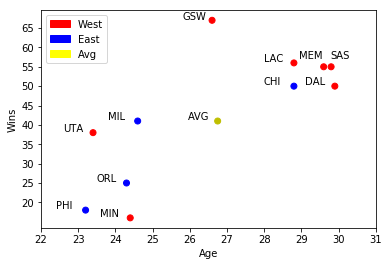

In [46]:
# create graph for 5 youngest and oldest teams; include AVG age of NBA teams
# if GSW is not 5 youngest or oldest, show GSW

# create ndarray variables holding teams, variable stats, and wins
teams_age_2015 = WINS_teams_2015[['Tm','Age','W']].sort_values(by='Age').head().values[:,0]
teams_age_x2015 = WINS_teams_2015[['Tm','Age','W']].sort_values(by='Age').head().values[:,1]
teams_age_y2015 = WINS_teams_2015[['Tm','Age','W']].sort_values(by='Age').head().values[:,2]

max_age_15 = WINS_teams_2015[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,0]
max_age_x15 = WINS_teams_2015[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,1]
max_age_y15 = WINS_teams_2015[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,2]

teams_age_2015 = np.concatenate((teams_age_2015, max_age_15), axis=None)
teams_age_x2015 = np.concatenate((teams_age_x2015, max_age_x15), axis=None)
teams_age_y2015 = np.concatenate((teams_age_y2015, max_age_y15), axis=None)

teams_age_2015 = np.concatenate((teams_age_2015, WINS_teams_2015.loc[49]['Tm']), axis=None)
teams_age_x2015 = np.concatenate((teams_age_x2015, WINS_teams_2015.loc[49]['Age']), axis=None)
teams_age_y2015 = np.concatenate((teams_age_y2015, WINS_teams_2015.loc[49]['W']), axis=None)

teams_age_2015 = np.concatenate((teams_age_2015, 'AVG'), axis=None)
teams_age_x2015 = np.concatenate((teams_age_x2015, WINS_teams_2015.mean()['Age'].round(2)), axis=None)
teams_age_y2015 = np.concatenate((teams_age_y2015, WINS_teams_2015.mean()['W']), axis=None)

# color markers based on team conference
age_col15 = []
for team in teams_age_2015:
    if team in west_conf:
        age_col15.append('r')
    elif team in east_conf:
        age_col15.append('b')
    else:
        age_col15.append('y')
        
plt.scatter(x=teams_age_x2015, y=teams_age_y2015, c=age_col15) # create graph

# create labels
for label15,x15,y15 in zip(teams_age_2015, teams_age_x2015, teams_age_y2015):
    if label15 == 'SAS':
        plt.annotate(s=label15, xy=(x15, y15), xytext=(-1,8), textcoords='offset points')
    elif label15 == 'MEM':
        plt.annotate(s=label15, xy=(x15, y15), xytext=(-25,8), textcoords='offset points')
    else:
        plt.annotate(s=label15, xy=(x15, y15), xytext=(-30,1), textcoords='offset points')

plt.xlabel('Age')
plt.ylabel('Wins')

# create legend
age_red15 = mpatches.Patch(color='red', label='West')
age_blue15 = mpatches.Patch(color='blue', label='East')
age_yellow15 = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[age_red15, age_blue15, age_yellow15])

# adjust graph ticks/parameters
plt.xlim(left=22, right=31)
plt.yticks(np.arange(20,70,step=5))
    
# plt.show()
plt.savefig('age_2015.png',bbox_inches='tight')

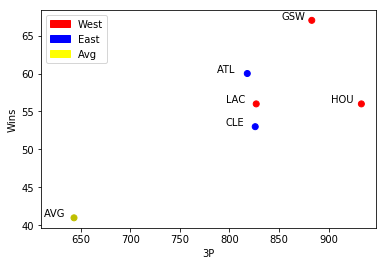

In [47]:
# create graph for top 5 teams in 3P; include AVG 3P of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_3p_2015 = WINS_teams_2015[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,0]
teams_3p_x2015 = WINS_teams_2015[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,1]
teams_3p_y2015 = WINS_teams_2015[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_3p_2015 = np.concatenate((teams_3p_2015, WINS_teams_2015.loc[49]['Tm']), axis=None)
# teams_3p_x2015 = np.concatenate((teams_3p_x2015, WINS_teams_2015.loc[49]['3P']), axis=None)
# teams_3p_y2015 = np.concatenate((teams_3p_y2015, WINS_teams_2015.loc[49]['W']), axis=None)

teams_3p_2015 = np.concatenate((teams_3p_2015, 'AVG'), axis=None)
teams_3p_x2015 = np.concatenate((teams_3p_x2015, WINS_teams_2015.mean()['3P'].round(2)), axis=None)
teams_3p_y2015 = np.concatenate((teams_3p_y2015, WINS_teams_2015.mean()['W']), axis=None)

# color markers based on team conference
col15_3p = []
for team in teams_3p_2015:
    if team in west_conf:
        col15_3p.append('r')
    elif team in east_conf:
        col15_3p.append('b')
    else:
        col15_3p.append('y')

plt.scatter(x=teams_3p_x2015, y=teams_3p_y2015, c=col15_3p) # create graph

# create labels
for label15,x15,y15 in zip(teams_3p_2015, teams_3p_x2015, teams_3p_y2015):
    plt.annotate(s=label15, xy=(x15, y15), xytext=(-30,1), textcoords='offset points')

plt.xlabel('3P')
plt.ylabel('Wins')    

# create legend
red15_3p = mpatches.Patch(color='red', label='West')
blue15_3p = mpatches.Patch(color='blue', label='East')
yellow15_3p = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red15_3p, blue15_3p, yellow15_3p])

# adjust graph ticks/parameters
plt.xlim(left=610)
    
# plt.show()
plt.savefig('3p_2015.png',bbox_inches='tight')

In [48]:
WINS_teams_2015[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values

array([['POR', 2881.0, 51],
       ['OKC', 2844.0, 45],
       ['IND', 2822.0, 38],
       ['GSW', 2814.0, 67],
       ['WAS', 2801.0, 46]], dtype=object)

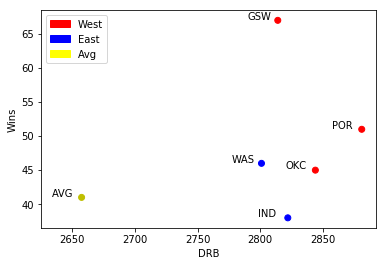

In [49]:
# create graph for top 5 teams in DRB; include AVG DRB of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_drb_2015 = WINS_teams_2015[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,0]
teams_drb_x2015 = WINS_teams_2015[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,1]
teams_drb_y2015 = WINS_teams_2015[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_drb_2015 = np.concatenate((teams_drb_2015, WINS_teams_2015.loc[49]['Tm']), axis=None)
# teams_drb_x2015 = np.concatenate((teams_drb_x2015, WINS_teams_2015.loc[49]['DRB']), axis=None)
# teams_drb_y2015 = np.concatenate((teams_drb_y2015, WINS_teams_2015.loc[49]['W']), axis=None)

teams_drb_2015 = np.concatenate((teams_drb_2015, 'AVG'), axis=None)
teams_drb_x2015 = np.concatenate((teams_drb_x2015, WINS_teams_2015.mean()['DRB'].round(2)), axis=None)
teams_drb_y2015 = np.concatenate((teams_drb_y2015, WINS_teams_2015.mean()['W']), axis=None)

# color markers based on team conference
col15_drb = []
for team in teams_drb_2015:
    if team in west_conf:
        col15_drb.append('r')
    elif team in east_conf:
        col15_drb.append('b')
    else:
        col15_drb.append('y')

plt.scatter(x=teams_drb_x2015, y=teams_drb_y2015, c=col15_drb) # create graph

# create labels
for label15,x15,y15 in zip(teams_drb_2015, teams_drb_x2015, teams_drb_y2015):
    plt.annotate(s=label15, xy=(x15, y15), xytext=(-30,1), textcoords='offset points')

plt.xlabel('DRB')
plt.ylabel('Wins') 

# create legend
red15_drb = mpatches.Patch(color='red', label='West')
blue15_drb = mpatches.Patch(color='blue', label='East')
yellow15_drb = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red15_drb, blue15_drb, yellow15_drb])

# adjust graph ticks/parameters
plt.xlim(left=2625)

# plt.show()
plt.savefig('drb_2015.png',bbox_inches='tight')

In [50]:
WINS_teams_2015[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values

array([['NOP', 510.0, 45],
       ['GSW', 496.0, 67],
       ['UTA', 489.0, 38],
       ['PHI', 487.0, 18],
       ['CHI', 476.0, 50]], dtype=object)

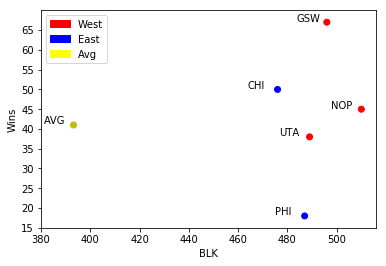

In [51]:
# create graph for top 5 teams in BLK; include AVG BLK of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_blk_2015 = WINS_teams_2015[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values[:,0]
teams_blk_x2015 = WINS_teams_2015[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values[:,1]
teams_blk_y2015 = WINS_teams_2015[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_blk_2015 = np.concatenate((teams_blk_2015, WINS_teams_2015.loc[49]['Tm']), axis=None)
# teams_blk_x2015 = np.concatenate((teams_blk_x2015, WINS_teams_2015.loc[49]['BLK']), axis=None)
# teams_blk_y2015 = np.concatenate((teams_blk_y2015, WINS_teams_2015.loc[49]['W']), axis=None)

teams_blk_2015 = np.concatenate((teams_blk_2015, 'AVG'), axis=None)
teams_blk_x2015 = np.concatenate((teams_blk_x2015, WINS_teams_2015.mean()['BLK'].round(2)), axis=None)
teams_blk_y2015 = np.concatenate((teams_blk_y2015, WINS_teams_2015.mean()['W']), axis=None)

# color markers based on team conference
col15_blk = []
for team in teams_blk_2015:
    if team in west_conf:
        col15_blk.append('r')
    elif team in east_conf:
        col15_blk.append('b')
    else:
        col15_blk.append('y')

plt.scatter(x=teams_blk_x2015, y=teams_blk_y2015, c=col15_blk) # create graph

# create labels
for label15,x15,y15 in zip(teams_blk_2015, teams_blk_x2015, teams_blk_y2015):
    plt.annotate(s=label15, xy=(x15, y15), xytext=(-30,1), textcoords='offset points')

plt.xlabel('BLK')
plt.ylabel('Wins') 

# create legend
red15_blk = mpatches.Patch(color='red', label='West')
blue15_blk = mpatches.Patch(color='blue', label='East')
yellow15_blk = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red15_blk, blue15_blk, yellow15_blk])

# adjust graph ticks/parameters
plt.xlim(left=380)
plt.ylim(top=70)

plt.yticks(np.arange(15,70,step=5))

# plt.show()
plt.savefig('blk_2015.png',bbox_inches='tight')

In [52]:
WINS_teams_2015[['Tm','AstTOVr','W']].sort_values(by='AstTOVr', ascending=False).head().values

array([['LAC', 2.0069169960474307, 56],
       ['GSW', 1.8970464135021097, 67],
       ['ATL', 1.8089117395029992, 60],
       ['BOS', 1.7731685789938216, 40],
       ['SAS', 1.7452006980802792, 55]], dtype=object)

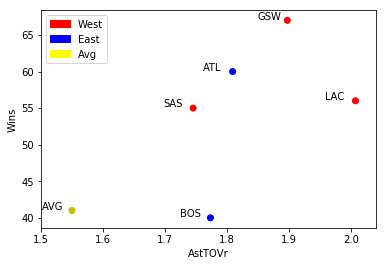

In [53]:
# create graph for top 5 teams in AstTOVr; include AVG AstTOVr of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_AstTOVr_2015 = WINS_teams_2015[['Tm','AstTOVr','W']].sort_values(by='AstTOVr', ascending=False).head().values[:,0]
teams_AstTOVr_x2015 = WINS_teams_2015[['Tm','AstTOVr','W']].sort_values(by='AstTOVr', ascending=False).head().values[:,1]
teams_AstTOVr_y2015 = WINS_teams_2015[['Tm','AstTOVr','W']].sort_values(by='AstTOVr', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_AstTOVr_2015 = np.concatenate((teams_AstTOVr_2015, WINS_teams_2015.loc[49]['Tm']), axis=None)
# teams_AstTOVr_x2015 = np.concatenate((teams_AstTOVr_x2015, WINS_teams_2015.loc[49]['AstTOVr']), axis=None)
# teams_AstTOVr_y2015 = np.concatenate((teams_AstTOVr_y2015, WINS_teams_2015.loc[49]['W']), axis=None)

teams_AstTOVr_2015 = np.concatenate((teams_AstTOVr_2015, 'AVG'), axis=None)
teams_AstTOVr_x2015 = np.concatenate((teams_AstTOVr_x2015, WINS_teams_2015.mean()['AstTOVr'].round(2)), axis=None)
teams_AstTOVr_y2015 = np.concatenate((teams_AstTOVr_y2015, WINS_teams_2015.mean()['W']), axis=None)

# color markers based on team conference
col15_AstTOVr = []
for team in teams_AstTOVr_2015:
    if team in west_conf:
        col15_AstTOVr.append('r')
    elif team in east_conf:
        col15_AstTOVr.append('b')
    else:
        col15_AstTOVr.append('y')

plt.scatter(x=teams_AstTOVr_x2015, y=teams_AstTOVr_y2015, c=col15_AstTOVr) # create graph

# create labels
for label15,x15,y15 in zip(teams_AstTOVr_2015, teams_AstTOVr_x2015, teams_AstTOVr_y2015):
    plt.annotate(s=label15, xy=(x15, y15), xytext=(-30,1), textcoords='offset points')

plt.xlabel('AstTOVr')
plt.ylabel('Wins')

# create legend
red15_AstTOVr = mpatches.Patch(color='red', label='West')
blue15_AstTOVr = mpatches.Patch(color='blue', label='East')
yellow15_AstTOVr = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red15_AstTOVr, blue15_AstTOVr, yellow15_AstTOVr])

# adjust graph ticks/parameters
plt.xlim(left=1.5)
    
# plt.show()
plt.savefig('asttovr_2015.png',bbox_inches='tight')

### <center> 2016 Season </center>

In [54]:
# create new lists for each conference; appending the Wins for each team in the given year
west_2016 = []
east_2016 = []

for i in west_conf:
    for e, team in enumerate(WINS_teams_2016['Tm']):
        if i == team:
            west_2016.append([WINS_teams_2016['Tm'].iloc[e], WINS_teams_2016['W'].iloc[e]])
            
for i in east_conf:
    for e, team in enumerate(WINS_teams_2016['Tm']):
        if i == team:
            east_2016.append([WINS_teams_2016['Tm'].iloc[e], WINS_teams_2016['W'].iloc[e]])

In [55]:
# sort list so that Wins are descending from greatest to lowest
west_2016_sorted = []
east_2016_sorted = []

west_2016_sorted = sorted(west_2016, key=lambda x:x[1], reverse=True)
east_2016_sorted = sorted(east_2016, key=lambda x:x[1], reverse=True)

In [56]:
# View teams that are greater than the mean statistic for each predictor variable and have equal or greater Wins than the 9th placed team in their respective conference
# Include team name ('Tm'), division ('Div'), wins ('Wins'), predictor variable ('Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%')
for f, col in enumerate(WINS_mean.columns): # loop through columns to run through each predictor variable
    print('\033[1m\033[4m' + '\n' + str('2016' + ' season: ' +  str(col) + ' stats'))
    for g in range(len(WINS_teams_2016)): # loop through total number of teams
        if WINS_mean.iloc[1][f] < WINS_teams_2016.iloc[g][f+3]: # check if statistic for team is greater than the average for the season
            for e, team in enumerate(west_2016_sorted): # check western conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2016.iloc[g][1] == team[0]:
                    if WINS_teams_2016.iloc[g][2] >= west_2016_sorted[7][1]:
                        if WINS_teams_2016.iloc[g][1] == 'GSW':
                            h = WINS_teams_2016.index[g]
                            print('\033[1m\033[91m' + 'Tm: ' + WINS_teams_2016['Tm'].loc[h] + '    Div: West    Wins: ' + str(WINS_teams_2016.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2016.iloc[g][f+3], 5)))
                        else:
                            i = WINS_teams_2016.index[g]
                            print('\033[0m' + 'Tm: ' + WINS_teams_2016['Tm'].loc[i] + '    Div: West    Wins: ' + str(WINS_teams_2016.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2016.iloc[g][f+3], 5)))  
                
            for e2, team2 in enumerate(east_2016_sorted): # check eastern conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2016.iloc[g][1] == team2[0]:
                    if WINS_teams_2016.iloc[g][2] >= east_2016_sorted[7][1]:
                        i = WINS_teams_2016.index[g]
                        print('\033[0m' + 'Tm: ' + WINS_teams_2016['Tm'].loc[i] + '    Div: East    Wins: ' + str(WINS_teams_2016.iloc[g][2])
                                + '    ' + col + ' ' + str(round(WINS_teams_2016.iloc[g][f+3], 5)))


2016 season: Age stats
Tm: ATL    Div: East    Wins: 48    Age 28.2
Tm: CLE    Div: East    Wins: 57    Age 28.1
Tm: DAL    Div: West    Wins: 42    Age 30.3
Tm: GSW    Div: West    Wins: 73    Age 27.4
Tm: HOU    Div: West    Wins: 41    Age 27.8
Tm: IND    Div: East    Wins: 45    Age 26.9
Tm: LAC    Div: West    Wins: 53    Age 29.7
Tm: MEM    Div: West    Wins: 42    Age 30.5
Tm: MIA    Div: East    Wins: 48    Age 28.4
Tm: SAS    Div: West    Wins: 67    Age 30.3

2016 season: 3P stats
Tm: ATL    Div: East    Wins: 48    3P 815.0
Tm: BOS    Div: East    Wins: 48    3P 717.0
Tm: CHO    Div: East    Wins: 48    3P 873.0
Tm: CLE    Div: East    Wins: 57    3P 880.0
Tm: DAL    Div: West    Wins: 42    3P 806.0
Tm: DET    Div: East    Wins: 44    3P 740.0
Tm: GSW    Div: West    Wins: 73    3P 1077.0
Tm: HOU    Div: West    Wins: 41    3P 878.0
Tm: LAC    Div: West    Wins: 53    3P 797.0
Tm: POR    Div: West    Wins: 44    3P 864.0
Tm: TOR    Div: East    Wins: 56    3P 708.0

2016 s

In [57]:
east_2016_sorted

[['CLE', 57],
 ['TOR', 56],
 ['ATL', 48],
 ['BOS', 48],
 ['CHO', 48],
 ['MIA', 48],
 ['IND', 45],
 ['DET', 44],
 ['CHI', 42],
 ['WAS', 41],
 ['ORL', 35],
 ['MIL', 33],
 ['NYK', 32],
 ['BRK', 21],
 ['PHI', 10]]

In [58]:
west_2016_sorted

[['GSW', 73],
 ['SAS', 67],
 ['OKC', 55],
 ['LAC', 53],
 ['POR', 44],
 ['DAL', 42],
 ['MEM', 42],
 ['HOU', 41],
 ['UTA', 40],
 ['DEN', 33],
 ['SAC', 33],
 ['NOP', 30],
 ['MIN', 29],
 ['PHO', 23],
 ['LAL', 17]]

In [59]:
WINS_teams_2016.sort_values(by='Age', ascending=False)

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
73,2016,MEM,42,30.5,504.0,0.331,2497.0,1697,350.0,1.556881,0.524288
33,2016,DAL,42,30.3,806.0,0.344,2781.0,1813,306.0,1.731614,0.544277
133,2016,SAS,67,30.3,570.0,0.375,2831.0,2010,485.0,1.876751,0.563544
63,2016,LAC,53,29.7,797.0,0.364,2727.0,1873,460.0,1.761994,0.556004
78,2016,MIA,48,28.4,498.0,0.336,2811.0,1709,531.0,1.479654,0.544887
3,2016,ATL,48,28.2,815.0,0.350,2772.0,2100,486.0,1.712887,0.551629
28,2016,CLE,57,28.1,880.0,0.362,2777.0,1861,317.0,1.670557,0.557509
53,2016,HOU,41,27.8,878.0,0.347,2601.0,1821,430.0,1.393267,0.552549
23,2016,CHI,42,27.6,651.0,0.371,2889.0,1870,470.0,1.638913,0.525748
48,2016,GSW,73,27.4,1077.0,0.416,2972.0,2373,498.0,1.906024,0.592769


In [60]:
# find the index of the min value for 'Age'
WINS_teams_2016['Age'].idxmin()

113

In [61]:
# find the index of the max value for each predictor variable
WINS_teams_2016[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax()

Age        73
3P         48
3P%        48
DRB        48
AST        48
BLK        78
AstTOVr    48
TS%        48
dtype: int64

In [62]:
# view the rows for indexes of max values and min value for 'Age'
WINS_teams_2016.loc[[113, 73,48,78]]

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
113,2016,PHI,10,23.3,764.0,0.339,2605.0,1765,495.0,1.314222,0.518634
73,2016,MEM,42,30.5,504.0,0.331,2497.0,1697,350.0,1.556881,0.524288
48,2016,GSW,73,27.4,1077.0,0.416,2972.0,2373,498.0,1.906024,0.592769
78,2016,MIA,48,28.4,498.0,0.336,2811.0,1709,531.0,1.479654,0.544887


**Create graphs for Age, BLK**

In [63]:
WINS_teams_2016[['Tm','Age','W']].sort_values(by='Age').head().values

array([['PHI', 23.3, 10],
       ['MIL', 23.5, 33],
       ['ORL', 23.9, 35],
       ['UTA', 24.2, 40],
       ['POR', 24.3, 44]], dtype=object)

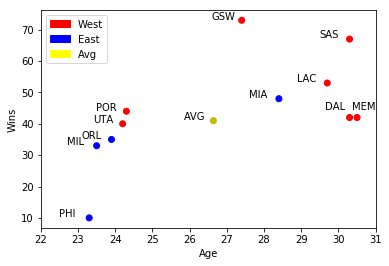

In [64]:
# create graph for 5 youngest and oldest teams; include AVG age of NBA teams
# if GSW is not 5 youngest or oldest, show GSW

# create ndarray variables holding teams, variable stats, and wins
teams_age_2016 = WINS_teams_2016[['Tm','Age','W']].sort_values(by='Age').head().values[:,0]
teams_age_x2016 = WINS_teams_2016[['Tm','Age','W']].sort_values(by='Age').head().values[:,1]
teams_age_y2016 = WINS_teams_2016[['Tm','Age','W']].sort_values(by='Age').head().values[:,2]

max_age_16 = WINS_teams_2016[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,0]
max_age_x16 = WINS_teams_2016[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,1]
max_age_y16 = WINS_teams_2016[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,2]

teams_age_2016 = np.concatenate((teams_age_2016, max_age_16), axis=None)
teams_age_x2016 = np.concatenate((teams_age_x2016, max_age_x16), axis=None)
teams_age_y2016 = np.concatenate((teams_age_y2016, max_age_y16), axis=None)

teams_age_2016 = np.concatenate((teams_age_2016, WINS_teams_2016.loc[48]['Tm']), axis=None)
teams_age_x2016 = np.concatenate((teams_age_x2016, WINS_teams_2016.loc[48]['Age']), axis=None)
teams_age_y2016 = np.concatenate((teams_age_y2016, WINS_teams_2016.loc[48]['W']), axis=None)

teams_age_2016 = np.concatenate((teams_age_2016, 'AVG'), axis=None)
teams_age_x2016 = np.concatenate((teams_age_x2016, WINS_teams_2016.mean()['Age'].round(2)), axis=None)
teams_age_y2016 = np.concatenate((teams_age_y2016, WINS_teams_2016.mean()['W']), axis=None)

# color markers based on team conference
col16_age = []
for team in teams_age_2016:
    if team in west_conf:
        col16_age.append('r')
    elif team in east_conf:
        col16_age.append('b')
    else:
        col16_age.append('y')

plt.scatter(x=teams_age_x2016, y=teams_age_y2016, c=col16_age) # create graph

# create labels
for label16,x16,y16 in zip(teams_age_2016, teams_age_x2016, teams_age_y2016):
    if label16 == 'MEM':
        plt.annotate(s=label16, xy=(x16, y16), xytext=(-5,8), textcoords='offset points')
    elif label16 == 'DAL':
        plt.annotate(s=label16, xy=(x16, y16), xytext=(-25,8), textcoords='offset points')
    else:
        plt.annotate(s=label16, xy=(x16, y16), xytext=(-30,1), textcoords='offset points') 

plt.xlabel('Age')
plt.ylabel('Wins')

# create legend
red16_age = mpatches.Patch(color='red', label='West')
blue16_age = mpatches.Patch(color='blue', label='East')
yellow16_age = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red16_age, blue16_age, yellow16_age])

# adjust graph ticks/parameters
plt.xlim(left=22, right=31)
    
# plt.show()
plt.savefig('age_2016.png',bbox_inches='tight')

In [65]:
WINS_teams_2016[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values

array([['MIA', 531.0, 48],
       ['GSW', 498.0, 73],
       ['PHI', 495.0, 10],
       ['OKC', 487.0, 55],
       ['ATL', 486.0, 48]], dtype=object)

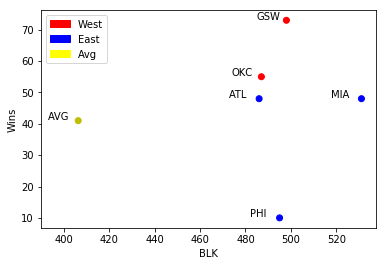

In [66]:
# create graph for top 5 teams in BLK; include AVG BLK of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_blk_2016 = WINS_teams_2016[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values[:,0]
teams_blk_x2016 = WINS_teams_2016[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values[:,1]
teams_blk_y2016 = WINS_teams_2016[['Tm','BLK','W']].sort_values(by='BLK', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_blk_2016 = np.concatenate((teams_blk_2016, WINS_teams_2016.loc[48]['Tm']), axis=None)
# teams_blk_x2016 = np.concatenate((teams_blk_x2016, WINS_teams_2016.loc[48]['BLK']), axis=None)
# teams_blk_y2016 = np.concatenate((teams_blk_y2016, WINS_teams_2016.loc[48]['W']), axis=None)

teams_blk_2016 = np.concatenate((teams_blk_2016, 'AVG'), axis=None)
teams_blk_x2016 = np.concatenate((teams_blk_x2016, WINS_teams_2016.mean()['BLK'].round(2)), axis=None)
teams_blk_y2016 = np.concatenate((teams_blk_y2016, WINS_teams_2016.mean()['W']), axis=None)

# color markers based on team conference
col16_blk = []
for team in teams_blk_2016:
    if team in west_conf:
        col16_blk.append('r')
    elif team in east_conf:
        col16_blk.append('b')
    else:
        col16_blk.append('y')

plt.scatter(x=teams_blk_x2016, y=teams_blk_y2016, c=col16_blk) # create graph

# create labels
for label16,x16,y16 in zip(teams_blk_2016, teams_blk_x2016, teams_blk_y2016):
    plt.annotate(s=label16, xy=(x16, y16), xytext=(-30,1), textcoords='offset points')

plt.xlabel('BLK')
plt.ylabel('Wins')

# create legend
red16_blk = mpatches.Patch(color='red', label='West')
blue16_blk = mpatches.Patch(color='blue', label='East')
yellow16_blk = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red16_blk, blue16_blk, yellow16_blk])

# adjust graph ticks/parameters
plt.xlim(left=390)
    
# plt.show()
plt.savefig('blk_2016.png',bbox_inches='tight')

### <center> 2017 Season </center>

In [67]:
# create new lists for each conference; appending the Wins for each team in the given year
west_2017 = []
east_2017 = []

for i in west_conf:
    for e, team in enumerate(WINS_teams_2017['Tm']):
        if i == team:
            west_2017.append([WINS_teams_2017['Tm'].iloc[e], WINS_teams_2017['W'].iloc[e]])
            
for i in east_conf:
    for e, team in enumerate(WINS_teams_2017['Tm']):
        if i == team:
            east_2017.append([WINS_teams_2017['Tm'].iloc[e], WINS_teams_2017['W'].iloc[e]])

In [68]:
# sort list so that Wins are descending from greatest to lowest
west_2017_sorted = []
east_2017_sorted = []

west_2017_sorted = sorted(west_2017, key=lambda x:x[1], reverse=True)
east_2017_sorted = sorted(east_2017, key=lambda x:x[1], reverse=True)

In [69]:
# View teams that are greater than the mean statistic for each predictor variable and have equal or greater Wins than the 9th placed team in their respective conference
# Include team name ('Tm'), division ('Div'), wins ('Wins'), predictor variable ('Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%')
for f, col in enumerate(WINS_mean.columns): # loop through columns to run through each predictor variable
    print('\033[1m\033[4m' + '\n' + str('2017' + ' season: ' +  str(col) + ' stats'))
    for g in range(len(WINS_teams_2017)): # loop through total number of teams
        if WINS_mean.iloc[2][f] < WINS_teams_2017.iloc[g][f+3]: # check if statistic for team is greater than the average for the season
            for e, team in enumerate(west_2017_sorted): # check western conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2017.iloc[g][1] == team[0]:
                    if WINS_teams_2017.iloc[g][2] >= west_2017_sorted[7][1]:
                        if WINS_teams_2017.iloc[g][1] == 'GSW':
                            h = WINS_teams_2017.index[g]
                            print('\033[1m\033[91m' + 'Tm: ' + WINS_teams_2017['Tm'].loc[h] + '    Div: West    Wins: ' + str(WINS_teams_2017.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2017.iloc[g][f+3], 5)))
                        else:
                            i = WINS_teams_2017.index[g]
                            print('\033[0m' + 'Tm: ' + WINS_teams_2017['Tm'].loc[i] + '    Div: West    Wins: ' + str(WINS_teams_2017.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2017.iloc[g][f+3], 5)))  
                
            for e2, team2 in enumerate(east_2017_sorted): # check eastern conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2017.iloc[g][1] == team2[0]:
                    if WINS_teams_2017.iloc[g][2] >= east_2017_sorted[7][1]:
                        i = WINS_teams_2017.index[g]
                        print('\033[0m' + 'Tm: ' + WINS_teams_2017['Tm'].loc[i] + '    Div: East    Wins: ' + str(WINS_teams_2017.iloc[g][2])
                                + '    ' + col + ' ' + str(round(WINS_teams_2017.iloc[g][f+3], 5)))


2017 season: Age stats
Tm: ATL    Div: East    Wins: 43    Age 27.9
Tm: CHI    Div: East    Wins: 41    Age 26.9
Tm: CLE    Div: East    Wins: 51    Age 29.2
Tm: GSW    Div: West    Wins: 67    Age 28.2
Tm: HOU    Div: West    Wins: 55    Age 27.4
Tm: IND    Div: East    Wins: 42    Age 27.0
Tm: LAC    Div: West    Wins: 51    Age 30.0
Tm: MEM    Div: West    Wins: 43    Age 29.5
Tm: SAS    Div: West    Wins: 61    Age 29.6
Tm: UTA    Div: West    Wins: 51    Age 26.8

2017 season: 3P stats
Tm: BOS    Div: East    Wins: 53    3P 985.0
Tm: CLE    Div: East    Wins: 51    3P 1067.0
Tm: GSW    Div: West    Wins: 67    3P 982.0
Tm: HOU    Div: West    Wins: 55    3P 1181.0
Tm: LAC    Div: West    Wins: 51    3P 841.0
Tm: MIA    Div: East    Wins: 41    3P 808.0
Tm: POR    Div: West    Wins: 41    3P 852.0

2017 season: 3P% stats
Tm: BOS    Div: East    Wins: 53    3P% 0.359
Tm: CLE    Div: East    Wins: 51    3P% 0.384
Tm: GSW    Div: West    Wins: 67    3P% 0.383
Tm: IND    Div: East    

In [70]:
east_2017_sorted

[['BOS', 53],
 ['CLE', 51],
 ['TOR', 51],
 ['WAS', 49],
 ['ATL', 43],
 ['IND', 42],
 ['MIL', 42],
 ['CHI', 41],
 ['MIA', 41],
 ['DET', 37],
 ['CHO', 36],
 ['NYK', 31],
 ['ORL', 29],
 ['PHI', 28],
 ['BRK', 20]]

In [71]:
west_2017_sorted

[['GSW', 67],
 ['SAS', 61],
 ['HOU', 55],
 ['LAC', 51],
 ['UTA', 51],
 ['OKC', 47],
 ['MEM', 43],
 ['POR', 41],
 ['DEN', 40],
 ['NOP', 34],
 ['DAL', 33],
 ['SAC', 32],
 ['MIN', 31],
 ['LAL', 26],
 ['PHO', 24]]

In [72]:
WINS_teams_2017.sort_values(by='Age', ascending=False)

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
62,2017,LAC,51,30.0,841.0,0.375,2790.0,1848,347.0,1.740113,0.574435
132,2017,SAS,61,29.6,753.0,0.391,2777.0,1954,484.0,1.774750,0.563873
72,2017,MEM,43,29.5,767.0,0.354,2621.0,1744,344.0,1.646837,0.535145
27,2017,CLE,51,29.2,1067.0,0.384,2821.0,1858,327.0,1.657449,0.579649
47,2017,GSW,67,28.2,982.0,0.383,2873.0,2491,555.0,2.056978,0.597372
2,2017,ATL,43,27.9,729.0,0.341,2793.0,1938,397.0,1.497682,0.541192
127,2017,SAC,32,27.8,737.0,0.376,2652.0,1844,324.0,1.535387,0.556383
32,2017,DAL,33,27.6,878.0,0.355,2516.0,1705,307.0,1.754115,0.541254
52,2017,HOU,55,27.4,1181.0,0.357,2746.0,2070,352.0,1.669355,0.583116
97,2017,NYK,31,27.3,704.0,0.348,2723.0,1786,455.0,1.568042,0.533573


In [73]:
# find the index of the min value for 'Age'
WINS_teams_2017['Age'].idxmin()

87

In [74]:
# find the index of the max value for each predictor variable
WINS_teams_2017[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax()

Age         62
3P          52
3P%        132
DRB         12
AST         47
BLK         47
AstTOVr     47
TS%         47
dtype: int64

In [75]:
# view the rows for indexes of max values and min value for 'Age'
WINS_teams_2017.loc[[87,62,52,132,12,47]]

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
87,2017,MIN,31,24.0,601.0,0.349,2540.0,1940,370.0,1.686957,0.555232
62,2017,LAC,51,30.0,841.0,0.375,2790.0,1848,347.0,1.740113,0.574435
52,2017,HOU,55,27.4,1181.0,0.357,2746.0,2070,352.0,1.669355,0.583116
132,2017,SAS,61,29.6,753.0,0.391,2777.0,1954,484.0,1.774750,0.563873
12,2017,BRK,20,26.0,877.0,0.338,2879.0,1756,387.0,1.294985,0.550611
47,2017,GSW,67,28.2,982.0,0.383,2873.0,2491,555.0,2.056978,0.597372


**Create graphs for Age, 3P, 3P%, DRB**

In [76]:
WINS_teams_2017[['Tm','Age','W']].sort_values(by='Age').head().values

array([['MIN', 24.0, 31],
       ['PHI', 24.6, 28],
       ['OKC', 24.7, 47],
       ['POR', 24.8, 41],
       ['PHO', 25.0, 24]], dtype=object)

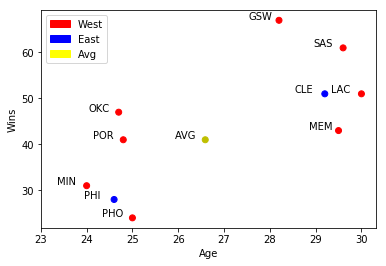

In [77]:
# create graph for 5 youngest and oldest teams; include AVG age of NBA teams
# if GSW is not 5 youngest or oldest, show GSW

# create ndarray variables holding teams, variable stats, and wins
teams_age_2017 = WINS_teams_2017[['Tm','Age','W']].sort_values(by='Age').head().values[:,0]
teams_age_x2017 = WINS_teams_2017[['Tm','Age','W']].sort_values(by='Age').head().values[:,1]
teams_age_y2017 = WINS_teams_2017[['Tm','Age','W']].sort_values(by='Age').head().values[:,2]

max_age_17 = WINS_teams_2017[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,0]
max_age_x17 = WINS_teams_2017[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,1]
max_age_y17 = WINS_teams_2017[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,2]

teams_age_2017 = np.concatenate((teams_age_2017, max_age_17), axis=None)
teams_age_x2017 = np.concatenate((teams_age_x2017, max_age_x17), axis=None)
teams_age_y2017 = np.concatenate((teams_age_y2017, max_age_y17), axis=None)

## GSW IS IN THE DESC HEAD FOR AGE
# teams_age_2017 = np.concatenate((teams_age_2017, WINS_teams_2017.loc[47]['Tm']), axis=None)
# teams_age_x2017 = np.concatenate((teams_age_x2017, WINS_teams_2017.loc[47]['Age']), axis=None)
# teams_age_y2017 = np.concatenate((teams_age_y2017, WINS_teams_2017.loc[47]['W']), axis=None)

teams_age_2017 = np.concatenate((teams_age_2017, 'AVG'), axis=None)
teams_age_x2017 = np.concatenate((teams_age_x2017, WINS_teams_2017.mean()['Age'].round(2)), axis=None)
teams_age_y2017 = np.concatenate((teams_age_y2017, WINS_teams_2017.mean()['W']), axis=None)

# color markers based on team conference
col17_age = []
for team in teams_age_2017:
    if team in west_conf:
        col17_age.append('r')
    elif team in east_conf:
        col17_age.append('b')
    else:
        col17_age.append('y')

plt.scatter(x=teams_age_x2017, y=teams_age_y2017, c=col17_age) # create graph

# create labels
for label17,x17,y17 in zip(teams_age_2017, teams_age_x2017, teams_age_y2017):
    plt.annotate(s=label17, xy=(x17, y17), xytext=(-30,1), textcoords='offset points')

plt.xlabel('Age')
plt.ylabel('Wins')

# create legend
red17_age = mpatches.Patch(color='red', label='West')
blue17_age = mpatches.Patch(color='blue', label='East')
yellow17_age = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red17_age, blue17_age, yellow17_age])

# adjust graph ticks/parameters
plt.xlim(left=23)
    
# plt.show()
plt.savefig('age_2017.png',bbox_inches='tight')

In [78]:
WINS_teams_2017[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values

array([['HOU', 1181.0, 55],
       ['CLE', 1067.0, 51],
       ['BOS', 985.0, 53],
       ['GSW', 982.0, 67],
       ['DAL', 878.0, 33]], dtype=object)

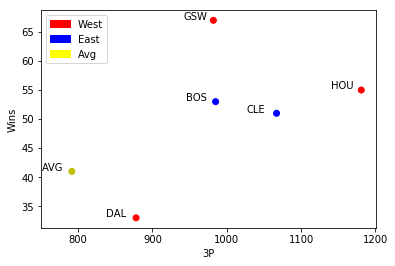

In [79]:
# create graph for top 5 teams in 3P; include AVG 3P of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_3p_2017 = WINS_teams_2017[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,0]
teams_3p_x2017 = WINS_teams_2017[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,1]
teams_3p_y2017 = WINS_teams_2017[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_3p_2017 = np.concatenate((teams_3p_2017, WINS_teams_2017.loc[47]['Tm']), axis=None)
# teams_3p_x2017 = np.concatenate((teams_3p_x2017, WINS_teams_2017.loc[47]['3P']), axis=None)
# teams_3p_y2017 = np.concatenate((teams_3p_y2017, WINS_teams_2017.loc[47]['W']), axis=None)

teams_3p_2017 = np.concatenate((teams_3p_2017, 'AVG'), axis=None)
teams_3p_x2017 = np.concatenate((teams_3p_x2017, WINS_teams_2017.mean()['3P'].round(2)), axis=None)
teams_3p_y2017 = np.concatenate((teams_3p_y2017, WINS_teams_2017.mean()['W']), axis=None)

# color markers based on team conference
col17_3p = []
for team in teams_3p_2017:
    if team in west_conf:
        col17_3p.append('r')
    elif team in east_conf:
        col17_3p.append('b')
    else:
        col17_3p.append('y')

plt.scatter(x=teams_3p_x2017, y=teams_3p_y2017, c=col17_3p) # create graph

# create labels
for label17,x17,y17 in zip(teams_3p_2017, teams_3p_x2017, teams_3p_y2017):
    plt.annotate(s=label17, xy=(x17, y17), xytext=(-30,1), textcoords='offset points')

plt.xlabel('3P')
plt.ylabel('Wins')

# create legend
red17_3p = mpatches.Patch(color='red', label='West')
blue17_3p = mpatches.Patch(color='blue', label='East')
yellow17_3p = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red17_3p, blue17_3p, yellow17_3p])

# adjust graph ticks/parameters
plt.xlim(left=750)
    
# plt.show()
plt.savefig('3p_2017.png',bbox_inches='tight')

In [80]:
WINS_teams_2017[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values

array([['SAS', 0.391, 61],
       ['CLE', 0.384, 51],
       ['GSW', 0.383, 67],
       ['IND', 0.376, 42],
       ['SAC', 0.376, 32]], dtype=object)

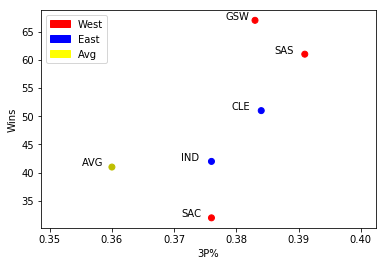

In [81]:
# create graph for top 5 teams in 3P%; include AVG 3P% of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_3pct_2017 = WINS_teams_2017[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values[:,0]
teams_3pct_x2017 = WINS_teams_2017[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values[:,1]
teams_3pct_y2017 = WINS_teams_2017[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_3pct_2017 = np.concatenate((teams_3pct_2017, WINS_teams_2017.loc[47]['Tm']), axis=None)
# teams_3pct_x2017 = np.concatenate((teams_3pct_x2017, WINS_teams_2017.loc[47]['3P%']), axis=None)
# teams_3pct_y2017 = np.concatenate((teams_3pct_y2017, WINS_teams_2017.loc[47]['W']), axis=None)

teams_3pct_2017 = np.concatenate((teams_3pct_2017, 'AVG'), axis=None)
teams_3pct_x2017 = np.concatenate((teams_3pct_x2017, WINS_teams_2017.mean()['3P%'].round(2)), axis=None)
teams_3pct_y2017 = np.concatenate((teams_3pct_y2017, WINS_teams_2017.mean()['W']), axis=None)

# color markers based on team conference
col17_3pct = []
for team in teams_3pct_2017:
    if team in west_conf:
        col17_3pct.append('r')
    elif team in east_conf:
        col17_3pct.append('b')
    else:
        col17_3pct.append('y')

plt.scatter(x=teams_3pct_x2017, y=teams_3pct_y2017, c=col17_3pct) # create graph

# create labels
for label17,x17,y17 in zip(teams_3pct_2017, teams_3pct_x2017, teams_3pct_y2017):
    plt.annotate(s=label17, xy=(x17, y17), xytext=(-30,1), textcoords='offset points')

plt.xlabel('3P%')
plt.ylabel('Wins')

# create legend
red17_3pct = mpatches.Patch(color='red', label='West')
blue17_3pct = mpatches.Patch(color='blue', label='East')
yellow17_3pct = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red17_3pct, blue17_3pct, yellow17_3pct])

# plt.show()
plt.savefig('3pct_2017.png',bbox_inches='tight')

In [82]:
WINS_teams_2017[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values

array([['NOP', 2879.0, 34],
       ['BRK', 2879.0, 20],
       ['GSW', 2873.0, 67],
       ['CHO', 2853.0, 36],
       ['DET', 2838.0, 37]], dtype=object)

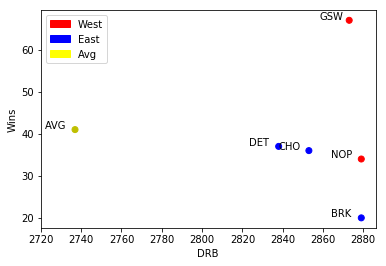

In [83]:
# create graph for top 5 teams in DRB; include AVG DRB of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_drb_2017 = WINS_teams_2017[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,0]
teams_drb_x2017 = WINS_teams_2017[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,1]
teams_drb_y2017 = WINS_teams_2017[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_drb_2017 = np.concatenate((teams_drb_2017, WINS_teams_2017.loc[47]['Tm']), axis=None)
# teams_drb_x2017 = np.concatenate((teams_drb_x2017, WINS_teams_2017.loc[47]['DRB']), axis=None)
# teams_drb_y2017 = np.concatenate((teams_drb_y2017, WINS_teams_2017.loc[47]['W']), axis=None)

teams_drb_2017 = np.concatenate((teams_drb_2017, 'AVG'), axis=None)
teams_drb_x2017 = np.concatenate((teams_drb_x2017, WINS_teams_2017.mean()['DRB'].round(2)), axis=None)
teams_drb_y2017 = np.concatenate((teams_drb_y2017, WINS_teams_2017.mean()['W']), axis=None)

# color markers based on team conference
col17_drb = []
for team in teams_drb_2017:
    if team in west_conf:
        col17_drb.append('r')
    elif team in east_conf:
        col17_drb.append('b')
    else:
        col17_drb.append('y')
        
plt.scatter(x=teams_drb_x2017, y=teams_drb_y2017, c=col17_drb) # create graph

# create labels
for label17,x17,y17 in zip(teams_drb_2017, teams_drb_x2017, teams_drb_y2017):
    plt.annotate(s=label17, xy=(x17, y17), xytext=(-30,1), textcoords='offset points')

plt.xlabel('DRB')
plt.ylabel('Wins')

# create legend
red17_drb = mpatches.Patch(color='red', label='West')
blue17_drb = mpatches.Patch(color='blue', label='East')
yellow17_drb = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red17_drb, blue17_drb, yellow17_drb])

# adjust graph ticks/parameters
plt.xlim(left=2720)

# plt.show()
plt.savefig('drb_2017.png',bbox_inches='tight')

### <center> 2018 Season </center>

In [84]:
# create new lists for each conference; appending the Wins for each team in the given year
west_2018 = []
east_2018 = []

for i in west_conf:
    for e, team in enumerate(WINS_teams_2018['Tm']):
        if i == team:
            west_2018.append([WINS_teams_2018['Tm'].iloc[e], WINS_teams_2018['W'].iloc[e]])
            
for i in east_conf:
    for e, team in enumerate(WINS_teams_2018['Tm']):
        if i == team:
            east_2018.append([WINS_teams_2018['Tm'].iloc[e], WINS_teams_2018['W'].iloc[e]])

In [85]:
# sort list so that Wins are descending from greatest to lowest
west_2018_sorted = []
east_2018_sorted = []

west_2018_sorted = sorted(west_2018, key=lambda x:x[1], reverse=True)
east_2018_sorted = sorted(east_2018, key=lambda x:x[1], reverse=True)

In [86]:
# View teams that are greater than the mean statistic for each predictor variable and have equal or greater Wins than the 9th placed team in their respective conference
# Include team name ('Tm'), division ('Div'), wins ('Wins'), predictor variable ('Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%')
for f, col in enumerate(WINS_mean.columns): # loop through columns to run through each predictor variable
    print('\033[1m\033[4m' + '\n' + str('2018' + ' season: ' +  str(col) + ' stats'))
    for g in range(len(WINS_teams_2018)): # loop through total number of teams
        if WINS_mean.iloc[3][f] < WINS_teams_2018.iloc[g][f+3]: # check if statistic for team is greater than the average for the season
            for e, team in enumerate(west_2018_sorted): # check western conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2018.iloc[g][1] == team[0]:
                    if WINS_teams_2018.iloc[g][2] >= west_2018_sorted[7][1]:
                        if WINS_teams_2018.iloc[g][1] == 'GSW':
                            h = WINS_teams_2018.index[g]
                            print('\033[1m\033[91m' + 'Tm: ' + WINS_teams_2018['Tm'].loc[h] + '    Div: West    Wins: ' + str(WINS_teams_2018.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2018.iloc[g][f+3], 5)))
                        else:
                            i = WINS_teams_2018.index[g]
                            print('\033[0m' + 'Tm: ' + WINS_teams_2018['Tm'].loc[i] + '    Div: West    Wins: ' + str(WINS_teams_2018.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2018.iloc[g][f+3], 5)))  
                
            for e2, team2 in enumerate(east_2018_sorted): # check eastern conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2018.iloc[g][1] == team2[0]:
                    if WINS_teams_2018.iloc[g][2] >= east_2018_sorted[7][1]:
                        i = WINS_teams_2018.index[g]
                        print('\033[0m' + 'Tm: ' + WINS_teams_2018['Tm'].loc[i] + '    Div: East    Wins: ' + str(WINS_teams_2018.iloc[g][2])
                                + '    ' + col + ' ' + str(round(WINS_teams_2018.iloc[g][f+3], 5)))


2018 season: Age stats
Tm: CLE    Div: East    Wins: 50    Age 30.6
Tm: GSW    Div: West    Wins: 58    Age 28.8
Tm: HOU    Div: West    Wins: 65    Age 29.8
Tm: MIA    Div: East    Wins: 44    Age 26.5
Tm: MIN    Div: West    Wins: 47    Age 27.1
Tm: NOP    Div: West    Wins: 48    Age 27.6
Tm: OKC    Div: West    Wins: 48    Age 27.3
Tm: SAS    Div: West    Wins: 47    Age 29.3
Tm: UTA    Div: West    Wins: 48    Age 26.7
Tm: WAS    Div: East    Wins: 43    Age 26.9

2018 season: 3P stats
Tm: BOS    Div: East    Wins: 55    3P 939.0
Tm: CLE    Div: East    Wins: 50    3P 981.0
Tm: GSW    Div: West    Wins: 58    3P 926.0
Tm: HOU    Div: West    Wins: 65    3P 1256.0
Tm: MIA    Div: East    Wins: 44    3P 903.0
Tm: OKC    Div: West    Wins: 48    3P 881.0
Tm: PHI    Div: East    Wins: 52    3P 901.0
Tm: TOR    Div: East    Wins: 59    3P 968.0
Tm: UTA    Div: West    Wins: 48    3P 887.0

2018 season: 3P% stats
Tm: BOS    Div: East    Wins: 55    3P% 0.377
Tm: CLE    Div: East    Win

In [87]:
east_2018_sorted

[['TOR', 59],
 ['BOS', 55],
 ['PHI', 52],
 ['CLE', 50],
 ['IND', 48],
 ['MIA', 44],
 ['MIL', 44],
 ['WAS', 43],
 ['DET', 39],
 ['CHO', 36],
 ['NYK', 29],
 ['BRK', 28],
 ['CHI', 27],
 ['ORL', 25],
 ['ATL', 24]]

In [88]:
west_2018_sorted

[['HOU', 65],
 ['GSW', 58],
 ['POR', 49],
 ['NOP', 48],
 ['OKC', 48],
 ['UTA', 48],
 ['MIN', 47],
 ['SAS', 47],
 ['DEN', 46],
 ['LAC', 42],
 ['LAL', 35],
 ['SAC', 27],
 ['DAL', 24],
 ['MEM', 22],
 ['PHO', 21]]

In [89]:
WINS_teams_2018.sort_values(by='Age', ascending=False)

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
26,2018,CLE,50,30.6,981.0,0.372,2761.0,1916,312.0,1.701599,0.583507
51,2018,HOU,65,29.8,1256.0,0.362,2825.0,1767,392.0,1.556828,0.589606
131,2018,SAS,47,29.3,696.0,0.352,2777.0,1868,460.0,1.732839,0.543232
46,2018,GSW,58,28.8,926.0,0.391,2877.0,2402,612.0,1.895817,0.602987
31,2018,DAL,24,27.7,967.0,0.360,2717.0,1858,310.0,1.843254,0.543732
91,2018,NOP,48,27.6,837.0,0.362,2924.0,2195,485.0,1.794767,0.572846
101,2018,OKC,48,27.3,881.0,0.354,2671.0,1750,412.0,1.525719,0.546304
86,2018,MIN,47,27.1,658.0,0.357,2593.0,1861,345.0,1.822723,0.565905
61,2018,LAC,42,27.0,777.0,0.354,2766.0,1832,373.0,1.521595,0.563792
146,2018,WAS,43,26.9,814.0,0.375,2713.0,2065,353.0,1.726589,0.560109


In [90]:
# find the index of the min value for 'Age'
WINS_teams_2018['Age'].idxmin()

66

In [91]:
# find the index of the max value for each predictor variable
WINS_teams_2018[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax()

Age         26
3P          51
3P%         46
DRB        111
AST         46
BLK         46
AstTOVr     46
TS%         46
dtype: int64

In [92]:
# view the rows for indexes of max values and min value for 'Age'
WINS_teams_2018.loc[[66,26,51,46,111]]

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
66,2018,LAL,35,23.7,822.0,0.345,2927.0,1949,388.0,1.505019,0.547822
26,2018,CLE,50,30.6,981.0,0.372,2761.0,1916,312.0,1.701599,0.583507
51,2018,HOU,65,29.8,1256.0,0.362,2825.0,1767,392.0,1.556828,0.589606
46,2018,GSW,58,28.8,926.0,0.391,2877.0,2402,612.0,1.895817,0.602987
111,2018,PHI,52,25.8,901.0,0.369,2996.0,2221,420.0,1.641537,0.568440


**Create graphs for Age, 3P, DRB**

In [93]:
WINS_teams_2018[['Tm','Age','W']].sort_values(by='Age').head().values

array([['PHO', 23.7, 21],
       ['LAL', 23.7, 35],
       ['CHI', 24.4, 27],
       ['BOS', 24.7, 55],
       ['BRK', 25.1, 28]], dtype=object)

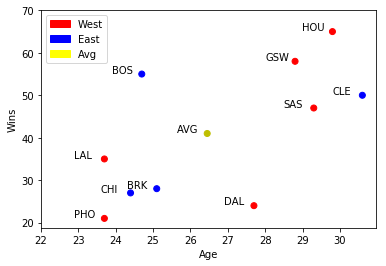

In [94]:
# create graph for 5 youngest and oldest teams; include AVG age of NBA teams
# if GSW is not 5 youngest or oldest, show GSW

# create ndarray variables holding teams, variable stats, and wins
teams_age_2018 = WINS_teams_2018[['Tm','Age','W']].sort_values(by='Age').head().values[:,0]
teams_age_x2018 = WINS_teams_2018[['Tm','Age','W']].sort_values(by='Age').head().values[:,1]
teams_age_y2018 = WINS_teams_2018[['Tm','Age','W']].sort_values(by='Age').head().values[:,2]

max_age_18 = WINS_teams_2018[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,0]
max_age_x18 = WINS_teams_2018[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,1]
max_age_y18 = WINS_teams_2018[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,2]

teams_age_2018 = np.concatenate((teams_age_2018, max_age_18), axis=None)
teams_age_x2018 = np.concatenate((teams_age_x2018, max_age_x18), axis=None)
teams_age_y2018 = np.concatenate((teams_age_y2018, max_age_y18), axis=None)

## GSW IS IN THE DESC HEAD FOR AGE
# teams_age_2018 = np.concatenate((teams_age_2018, WINS_teams_2018.loc[46]['Tm']), axis=None)
# teams_age_x2018 = np.concatenate((teams_age_x2018, WINS_teams_2018.loc[46]['Age']), axis=None)
# teams_age_y2018 = np.concatenate((teams_age_y2018, WINS_teams_2018.loc[46]['W']), axis=None)

teams_age_2018 = np.concatenate((teams_age_2018, 'AVG'), axis=None)
teams_age_x2018 = np.concatenate((teams_age_x2018, WINS_teams_2018.mean()['Age'].round(2)), axis=None)
teams_age_y2018 = np.concatenate((teams_age_y2018, WINS_teams_2018.mean()['W']), axis=None)

# color markers based on team conference
col18_age = []
for team in teams_age_2018:
    if team in west_conf:
        col18_age.append('r')
    elif team in east_conf:
        col18_age.append('b')
    else:
        col18_age.append('y')

plt.scatter(x=teams_age_x2018, y=teams_age_y2018, c=col18_age) # create graph

# create labels
for label18,x18,y18 in zip(teams_age_2018, teams_age_x2018, teams_age_y2018):
    plt.annotate(s=label18, xy=(x18, y18), xytext=(-30,1), textcoords='offset points')

plt.xlabel('Age')
plt.ylabel('Wins')

# create legend
red18_age = mpatches.Patch(color='red', label='West')
blue18_age = mpatches.Patch(color='blue', label='East')
yellow18_age = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red18_age, blue18_age, yellow18_age])

# adjust graph ticks/parameters
plt.xlim(left=22)
plt.ylim(top=70)
    
# plt.show()
plt.savefig('age_2018.png',bbox_inches='tight')

In [95]:
WINS_teams_2018[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values

array([['HOU', 1256.0, 65],
       ['BRK', 1041.0, 28],
       ['CLE', 981.0, 50],
       ['TOR', 968.0, 59],
       ['DAL', 967.0, 24]], dtype=object)

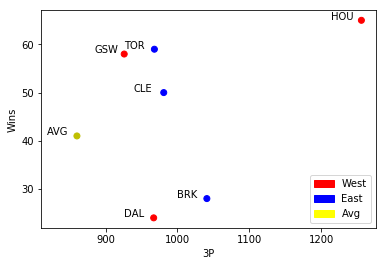

In [96]:
# create graph for top 5 teams in 3P; include AVG 3P of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_3p_2018 = WINS_teams_2018[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,0]
teams_3p_x2018 = WINS_teams_2018[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,1]
teams_3p_y2018 = WINS_teams_2018[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,2]

teams_3p_2018 = np.concatenate((teams_3p_2018, WINS_teams_2018.loc[46]['Tm']), axis=None)
teams_3p_x2018 = np.concatenate((teams_3p_x2018, WINS_teams_2018.loc[46]['3P']), axis=None)
teams_3p_y2018 = np.concatenate((teams_3p_y2018, WINS_teams_2018.loc[46]['W']), axis=None)

teams_3p_2018 = np.concatenate((teams_3p_2018, 'AVG'), axis=None)
teams_3p_x2018 = np.concatenate((teams_3p_x2018, WINS_teams_2018.mean()['3P'].round(2)), axis=None)
teams_3p_y2018 = np.concatenate((teams_3p_y2018, WINS_teams_2018.mean()['W']), axis=None)

# color markers based on team conference
col18_3p = []
for team in teams_3p_2018:
    if team in west_conf:
        col18_3p.append('r')
    elif team in east_conf:
        col18_3p.append('b')
    else:
        col18_3p.append('y')
        
plt.scatter(x=teams_3p_x2018, y=teams_3p_y2018, c=col18_3p) # create graph

# create labels
for label18,x18,y18 in zip(teams_3p_2018, teams_3p_x2018, teams_3p_y2018):
    plt.annotate(s=label18, xy=(x18, y18), xytext=(-30,1), textcoords='offset points')

plt.xlabel('3P')
plt.ylabel('Wins')

# create legend
red18_3p = mpatches.Patch(color='red', label='West')
blue18_3p = mpatches.Patch(color='blue', label='East')
yellow18_3p = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='lower right', handles=[red18_3p, blue18_3p, yellow18_3p])

# adjust graph ticks/parameters
plt.xlim(left=810)
    
# plt.show()
plt.savefig('3p_2018.png',bbox_inches='tight')

In [97]:
WINS_teams_2018[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values

array([['PHI', 2996.0, 52],
       ['LAL', 2927.0, 35],
       ['NOP', 2924.0, 48],
       ['CHO', 2901.0, 36],
       ['POR', 2893.0, 49]], dtype=object)

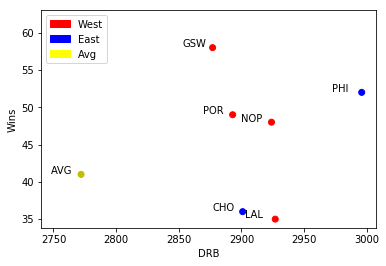

In [98]:
# create graph for top 5 teams in DRB; include AVG DRB of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_drb_2018 = WINS_teams_2018[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,0]
teams_drb_x2018 = WINS_teams_2018[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,1]
teams_drb_y2018 = WINS_teams_2018[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,2]

teams_drb_2018 = np.concatenate((teams_drb_2018, WINS_teams_2018.loc[46]['Tm']), axis=None)
teams_drb_x2018 = np.concatenate((teams_drb_x2018, WINS_teams_2018.loc[46]['DRB']), axis=None)
teams_drb_y2018 = np.concatenate((teams_drb_y2018, WINS_teams_2018.loc[46]['W']), axis=None)

teams_drb_2018 = np.concatenate((teams_drb_2018, 'AVG'), axis=None)
teams_drb_x2018 = np.concatenate((teams_drb_x2018, WINS_teams_2018.mean()['DRB'].round(2)), axis=None)
teams_drb_y2018 = np.concatenate((teams_drb_y2018, WINS_teams_2018.mean()['W']), axis=None)

# color markers based on team conference
col18_drb = []
for team in teams_drb_2018:
    if team in west_conf:
        col18_drb.append('r')
    elif team in east_conf:
        col18_drb.append('b')
    else:
        col18_drb.append('y')
        
plt.scatter(x=teams_drb_x2018, y=teams_drb_y2018, c=col18_drb) # create graph

# create labels
for label18,x18,y18 in zip(teams_drb_2018, teams_drb_x2018, teams_drb_y2018):
    plt.annotate(s=label18, xy=(x18, y18), xytext=(-30,1), textcoords='offset points')

plt.xlabel('DRB')
plt.ylabel('Wins')

# create legend
red18_drb = mpatches.Patch(color='red', label='West')
blue18_drb = mpatches.Patch(color='blue', label='East')
yellow18_drb = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red18_drb, blue18_drb, yellow18_drb])

# adjust graph ticks/parameters
plt.xlim(left=2740)
plt.ylim(top=63)
    
# plt.show()
plt.savefig('drb_2018.png',bbox_inches='tight')

### <center> 2019 Season </center>

In [99]:
# create new lists for each conference; appending the Wins for each team in the given year
west_2019 = []
east_2019 = []

for i in west_conf:
    for e, team in enumerate(WINS_teams_2019['Tm']):
        if i == team:
            west_2019.append([WINS_teams_2019['Tm'].iloc[e], WINS_teams_2019['W'].iloc[e]])
            
for i in east_conf:
    for e, team in enumerate(WINS_teams_2019['Tm']):
        if i == team:
            east_2019.append([WINS_teams_2019['Tm'].iloc[e], WINS_teams_2019['W'].iloc[e]])

In [100]:
# sort list so that Wins are descending from greatest to lowest
west_2019_sorted = []
east_2019_sorted = []

west_2019_sorted = sorted(west_2019, key=lambda x:x[1], reverse=True)
east_2019_sorted = sorted(east_2019, key=lambda x:x[1], reverse=True)

In [101]:
# View teams that are greater than the mean statistic for each predictor variable and have equal or greater Wins than the 9th placed team in their respective conference
# Include team name ('Tm'), division ('Div'), wins ('Wins'), predictor variable ('Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%')
for f, col in enumerate(WINS_mean.columns): # loop through columns to run through each predictor variable
    print('\033[1m\033[4m' + '\n' + str('2019' + ' season: ' +  str(col) + ' stats'))
    for g in range(len(WINS_teams_2019)): # loop through total number of teams
        if WINS_mean.iloc[4][f] < WINS_teams_2019.iloc[g][f+3]: # check if statistic for team is greater than the average for the season
            for e, team in enumerate(west_2019_sorted): # check western conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2019.iloc[g][1] == team[0]:
                    if WINS_teams_2019.iloc[g][2] >= west_2019_sorted[7][1]:
                        if WINS_teams_2019.iloc[g][1] == 'GSW':
                            h = WINS_teams_2019.index[g]
                            print('\033[1m\033[91m' + 'Tm: ' + WINS_teams_2019['Tm'].loc[h] + '    Div: West    Wins: ' + str(WINS_teams_2019.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2019.iloc[g][f+3], 5)))
                        else:
                            i = WINS_teams_2019.index[g]
                            print('\033[0m' + 'Tm: ' + WINS_teams_2019['Tm'].loc[i] + '    Div: West    Wins: ' + str(WINS_teams_2019.iloc[g][2]) 
                                  + '    ' + col + ' ' + str(round(WINS_teams_2019.iloc[g][f+3], 5)))  
                
            for e2, team2 in enumerate(east_2019_sorted): # check eastern conference teams; only list teams with more Wins than 9th team in respective conference
                if WINS_teams_2019.iloc[g][1] == team2[0]:
                    if WINS_teams_2019.iloc[g][2] >= east_2019_sorted[7][1]:
                        i = WINS_teams_2019.index[g]
                        print('\033[0m' + 'Tm: ' + WINS_teams_2019['Tm'].loc[i] + '    Div: East    Wins: ' + str(WINS_teams_2019.iloc[g][2])
                                + '    ' + col + ' ' + str(round(WINS_teams_2019.iloc[g][f+3], 5)))


2019 season: Age stats
Tm: DET    Div: East    Wins: 41    Age 26.9
Tm: GSW    Div: West    Wins: 57    Age 28.4
Tm: HOU    Div: West    Wins: 53    Age 29.2
Tm: IND    Div: East    Wins: 48    Age 27.0
Tm: LAC    Div: West    Wins: 48    Age 27.2
Tm: MIL    Div: East    Wins: 60    Age 26.9
Tm: PHI    Div: East    Wins: 51    Age 26.4
Tm: SAS    Div: West    Wins: 48    Age 28.8
Tm: TOR    Div: East    Wins: 58    Age 27.3
Tm: UTA    Div: West    Wins: 50    Age 27.3

2019 season: 3P stats
Tm: BOS    Div: East    Wins: 49    3P 1032.0
Tm: BRK    Div: East    Wins: 42    3P 1047.0
Tm: DET    Div: East    Wins: 41    3P 993.0
Tm: GSW    Div: West    Wins: 57    3P 1087.0
Tm: HOU    Div: West    Wins: 53    3P 1323.0
Tm: MIL    Div: East    Wins: 60    3P 1105.0
Tm: OKC    Div: West    Wins: 49    3P 932.0
Tm: ORL    Div: East    Wins: 42    3P 937.0
Tm: TOR    Div: East    Wins: 58    3P 1015.0
Tm: UTA    Div: West    Wins: 50    3P 993.0

2019 season: 3P% stats
Tm: BOS    Div: East   

In [102]:
east_2019_sorted

[['MIL', 60],
 ['TOR', 58],
 ['PHI', 51],
 ['BOS', 49],
 ['IND', 48],
 ['BRK', 42],
 ['ORL', 42],
 ['DET', 41],
 ['CHO', 39],
 ['MIA', 39],
 ['WAS', 32],
 ['ATL', 29],
 ['CHI', 22],
 ['CLE', 19],
 ['NYK', 17]]

In [103]:
west_2019_sorted

[['GSW', 57],
 ['DEN', 54],
 ['HOU', 53],
 ['POR', 53],
 ['UTA', 50],
 ['OKC', 49],
 ['LAC', 48],
 ['SAS', 48],
 ['SAC', 39],
 ['LAL', 37],
 ['MIN', 36],
 ['DAL', 33],
 ['MEM', 33],
 ['NOP', 33],
 ['PHO', 19]]

In [104]:
WINS_teams_2019.sort_values(by='Age', ascending=False)

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
50,2019,HOU,53,29.2,1323.0,0.356,2613.0,1741,405.0,1.591408,0.580660
130,2019,SAS,48,28.8,812.0,0.392,2910.0,2013,386.0,2.029234,0.571907
45,2019,GSW,57,28.4,1087.0,0.385,2990.0,2413,525.0,2.064157,0.595923
70,2019,MEM,33,27.7,811.0,0.342,2703.0,1963,448.0,1.711421,0.547595
140,2019,UTA,50,27.3,993.0,0.356,2981.0,2133,483.0,1.720161,0.572385
135,2019,TOR,58,27.3,1015.0,0.366,2920.0,2085,437.0,1.813043,0.579379
60,2019,LAC,48,27.2,821.0,0.388,2936.0,1970,385.0,1.651299,0.575199
75,2019,MIA,39,27.0,928.0,0.349,2879.0,1991,448.0,1.648179,0.541609
55,2019,IND,48,27.0,779.0,0.374,2766.0,2128,404.0,1.896613,0.560933
30,2019,DAL,33,26.9,1022.0,0.340,2884.0,1918,351.0,1.643530,0.555477


In [105]:
# find the index of the min value for 'Age'
WINS_teams_2019['Age'].idxmin()

95

In [106]:
# find the index of the max value for each predictor variable
WINS_teams_2019[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax()

Age         50
3P          50
3P%        130
DRB         80
AST         45
BLK         45
AstTOVr     45
TS%         45
dtype: int64

In [107]:
# view the rows for indexes of max values and min value for 'Age'
WINS_teams_2019.loc[[95,50,130,80,45]]

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
95,2019,NYK,17,23.4,823.0,0.340,2811.0,1646,422.0,1.430061,0.529214
50,2019,HOU,53,29.2,1323.0,0.356,2613.0,1741,405.0,1.591408,0.580660
130,2019,SAS,48,28.8,812.0,0.392,2910.0,2013,386.0,2.029234,0.571907
80,2019,MIL,60,26.9,1105.0,0.353,3316.0,2136,486.0,1.878628,0.582879
45,2019,GSW,57,28.4,1087.0,0.385,2990.0,2413,525.0,2.064157,0.595923


**Create graphs for Age, 3P, 3P%, DRB**

In [108]:
WINS_teams_2019[['Tm','Age','W']].sort_values(by='Age').head().values

array([['NYK', 23.4, 17],
       ['CHI', 24.0, 22],
       ['PHO', 24.0, 19],
       ['SAC', 24.8, 39],
       ['DEN', 24.9, 54]], dtype=object)

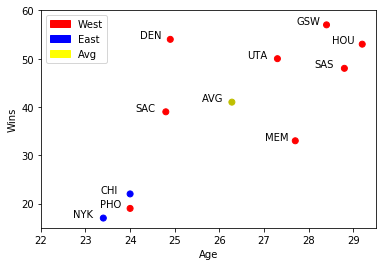

In [109]:
# create graph for 5 youngest and oldest teams; include AVG age of NBA teams
# if GSW is not 5 youngest or oldest, show GSW

# create ndarray variables holding teams, variable stats, and wins
teams_age_2019 = WINS_teams_2019[['Tm','Age','W']].sort_values(by='Age').head().values[:,0]
teams_age_x2019 = WINS_teams_2019[['Tm','Age','W']].sort_values(by='Age').head().values[:,1]
teams_age_y2019 = WINS_teams_2019[['Tm','Age','W']].sort_values(by='Age').head().values[:,2]

max_age_19 = WINS_teams_2019[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,0]
max_age_x19 = WINS_teams_2019[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,1]
max_age_y19 = WINS_teams_2019[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,2]

teams_age_2019 = np.concatenate((teams_age_2019, max_age_19), axis=None)
teams_age_x2019 = np.concatenate((teams_age_x2019, max_age_x19), axis=None)
teams_age_y2019 = np.concatenate((teams_age_y2019, max_age_y19), axis=None)

## GSW IS IN THE DESC HEAD FOR AGE
# teams_age_2019 = np.concatenate((teams_age_2019, WINS_teams_2019.loc[45]['Tm']), axis=None)
# teams_age_x2019 = np.concatenate((teams_age_x2019, WINS_teams_2019.loc[45]['Age']), axis=None)
# teams_age_y2019 = np.concatenate((teams_age_y2019, WINS_teams_2019.loc[45]['W']), axis=None)

teams_age_2019 = np.concatenate((teams_age_2019, 'AVG'), axis=None)
teams_age_x2019 = np.concatenate((teams_age_x2019, WINS_teams_2019.mean()['Age'].round(2)), axis=None)
teams_age_y2019 = np.concatenate((teams_age_y2019, WINS_teams_2019.mean()['W']), axis=None)

# color markers based on team conference
col19_age = []
for team in teams_age_2019:
    if team in west_conf:
        col19_age.append('r')
    elif team in east_conf:
        col19_age.append('b')
    else:
        col19_age.append('y')
        
plt.scatter(x=teams_age_x2019, y=teams_age_y2019, c=col19_age) # create graph

# create labels
for label19,x19,y19 in zip(teams_age_2019, teams_age_x2019, teams_age_y2019):
    plt.annotate(s=label19, xy=(x19, y19), xytext=(-30,1), textcoords='offset points')

plt.xlabel('Age')
plt.ylabel('Wins')

# create legend
red19_age = mpatches.Patch(color='red', label='West')
blue19_age = mpatches.Patch(color='blue', label='East')
yellow19_age = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red19_age, blue19_age, yellow19_age])

# adjust graph ticks/parameters
plt.xlim(left=22)
plt.ylim(top=60)
    
# plt.show()
plt.savefig('age_2019.png',bbox_inches='tight')

In [110]:
WINS_teams_2019[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values

array([['HOU', 1323.0, 53],
       ['MIL', 1105.0, 60],
       ['GSW', 1087.0, 57],
       ['ATL', 1067.0, 29],
       ['BRK', 1047.0, 42]], dtype=object)

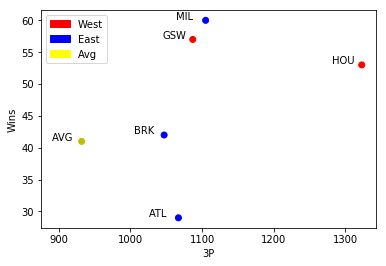

In [111]:
# create graph for top 5 teams in 3P; include AVG 3P of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_3p_2019 = WINS_teams_2019[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,0]
teams_3p_x2019 = WINS_teams_2019[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,1]
teams_3p_y2019 = WINS_teams_2019[['Tm','3P','W']].sort_values(by='3P', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_3p_2019 = np.concatenate((teams_3p_2019, WINS_teams_2019.loc[45]['Tm']), axis=None)
# teams_3p_x2019 = np.concatenate((teams_3p_x2019, WINS_teams_2019.loc[45]['3P']), axis=None)
# teams_3p_y2019 = np.concatenate((teams_3p_y2019, WINS_teams_2019.loc[45]['W']), axis=None)

teams_3p_2019 = np.concatenate((teams_3p_2019, 'AVG'), axis=None)
teams_3p_x2019 = np.concatenate((teams_3p_x2019, WINS_teams_2019.mean()['3P'].round(2)), axis=None)
teams_3p_y2019 = np.concatenate((teams_3p_y2019, WINS_teams_2019.mean()['W']), axis=None)

# color markers based on team conference
col19_3p = []
for team in teams_3p_2019:
    if team in west_conf:
        col19_3p.append('r')
    elif team in east_conf:
        col19_3p.append('b')
    else:
        col19_3p.append('y')
        
plt.scatter(x=teams_3p_x2019, y=teams_3p_y2019, c=col19_3p) # create graph

# create labels
for label19,x19,y19 in zip(teams_3p_2019, teams_3p_x2019, teams_3p_y2019):
    plt.annotate(s=label19, xy=(x19, y19), xytext=(-30,1), textcoords='offset points')

plt.xlabel('3P')
plt.ylabel('Wins')

# create legend
red19_3p = mpatches.Patch(color='red', label='West')
blue19_3p = mpatches.Patch(color='blue', label='East')
yellow19_3p = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red19_3p, blue19_3p, yellow19_3p])

# adjust graph ticks/parameters
plt.xlim(left=875)
    
# plt.show()
plt.savefig('3p_2019.png',bbox_inches='tight')

In [112]:
WINS_teams_2019[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values

array([['SAS', 0.392, 48],
       ['LAC', 0.388, 48],
       ['GSW', 0.385, 57],
       ['SAC', 0.378, 39],
       ['IND', 0.374, 48]], dtype=object)

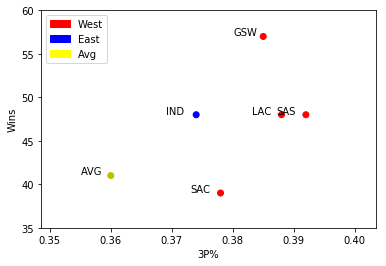

In [113]:
# create graph for top 5 teams in 3P%; include AVG 3P% of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_3pct_2019 = WINS_teams_2019[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values[:,0]
teams_3pct_x2019 = WINS_teams_2019[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values[:,1]
teams_3pct_y2019 = WINS_teams_2019[['Tm','3P%','W']].sort_values(by='3P%', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_3pct_2019 = np.concatenate((teams_3pct_2019, WINS_teams_2019.loc[45]['Tm']), axis=None)
# teams_3pct_x2019 = np.concatenate((teams_3pct_x2019, WINS_teams_2019.loc[45]['3P%']), axis=None)
# teams_3pct_y2019 = np.concatenate((teams_3pct_y2019, WINS_teams_2019.loc[45]['W']), axis=None)

teams_3pct_2019 = np.concatenate((teams_3pct_2019, 'AVG'), axis=None)
teams_3pct_x2019 = np.concatenate((teams_3pct_x2019, WINS_teams_2019.mean()['3P%'].round(2)), axis=None)
teams_3pct_y2019 = np.concatenate((teams_3pct_y2019, WINS_teams_2019.mean()['W']), axis=None)

# color markers based on team conference
col19_3pct = []
for team in teams_3pct_2019:
    if team in west_conf:
        col19_3pct.append('r')
    elif team in east_conf:
        col19_3pct.append('b')
    else:
        col19_3pct.append('y')
        
plt.scatter(x=teams_3pct_x2019, y=teams_3pct_y2019, c=col19_3pct) # create graph

# create labels
for label19,x19,y19 in zip(teams_3pct_2019, teams_3pct_x2019, teams_3pct_y2019):
    plt.annotate(s=label19, xy=(x19, y19), xytext=(-30,1), textcoords='offset points')

plt.xlabel('3P%')
plt.ylabel('Wins')

# create legend
red19_3pct = mpatches.Patch(color='red', label='West')
blue19_3pct = mpatches.Patch(color='blue', label='East')
yellow19_3pct = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red19_3pct, blue19_3pct, yellow19_3pct])

# adjust graph ticks/parameters
plt.ylim(bottom=35, top=60)
    
# plt.show()
plt.savefig('3pct_2019.png',bbox_inches='tight')

In [114]:
WINS_teams_2019[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values

array([['MIL', 3316.0, 60],
       ['PHI', 3025.0, 51],
       ['GSW', 2990.0, 57],
       ['LAL', 2985.0, 37],
       ['UTA', 2981.0, 50]], dtype=object)

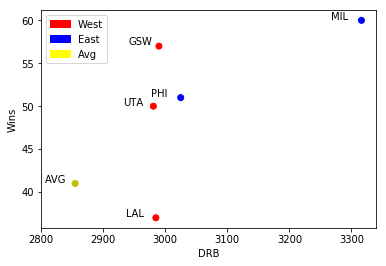

In [115]:
# create graph for top 5 teams in DRB; include AVG DRB of NBA teams and GSW standing

# create ndarray variables holding teams, variable stats, and wins
teams_drb_2019 = WINS_teams_2019[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,0]
teams_drb_x2019 = WINS_teams_2019[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,1]
teams_drb_y2019 = WINS_teams_2019[['Tm','DRB','W']].sort_values(by='DRB', ascending=False).head().values[:,2]

## DO NOT NEED; GSW IS IN THE TOP 5 (i.e. "head()")
# teams_drb_2019 = np.concatenate((teams_drb_2019, WINS_teams_2019.loc[45]['Tm']), axis=None)
# teams_drb_x2019 = np.concatenate((teams_drb_x2019, WINS_teams_2019.loc[45]['DRB']), axis=None)
# teams_drb_y2019 = np.concatenate((teams_drb_y2019, WINS_teams_2019.loc[45]['W']), axis=None)

teams_drb_2019 = np.concatenate((teams_drb_2019, 'AVG'), axis=None)
teams_drb_x2019 = np.concatenate((teams_drb_x2019, WINS_teams_2019.mean()['DRB'].round(2)), axis=None)
teams_drb_y2019 = np.concatenate((teams_drb_y2019, WINS_teams_2019.mean()['W']), axis=None)

# color markers based on team conference
col19_drb = []
for team in teams_drb_2019:
    if team in west_conf:
        col19_drb.append('r')
    elif team in east_conf:
        col19_drb.append('b')
    else:
        col19_drb.append('y')
        
plt.scatter(x=teams_drb_x2019, y=teams_drb_y2019, c=col19_drb) # create graph

# create labels
for label19,x19,y19 in zip(teams_drb_2019, teams_drb_x2019, teams_drb_y2019):
    plt.annotate(s=label19, xy=(x19, y19), xytext=(-30,1), textcoords='offset points')

plt.xlabel('DRB')
plt.ylabel('Wins')

# create legend
red19_drb = mpatches.Patch(color='red', label='West')
blue19_drb = mpatches.Patch(color='blue', label='East')
yellow19_drb = mpatches.Patch(color='yellow', label='Avg')

plt.legend(loc='upper left', handles=[red19_drb, blue19_drb, yellow19_drb])

# adjust graph ticks/parameters
plt.xlim(left=2800)
    
# plt.show()
plt.savefig('drb_2019.png',bbox_inches='tight')